# Вакансии аналитиков на headhunter.ru

* Данные получены из API HH.ru

1. Предобработка данных.
2. Исследовательский анализ данных.
3. Выявление грейда требуемых специалистов по названию вакансии или по колонке с
требуемым опытом.
4. Определение доли грейдов Junior, Junior+, Middle, Senior среди вакансий Аналитик данных и
Системный аналитик.
5. Определение типичного места работы для Аналитика данных и Системного аналитика по
следующим параметрам: ТОП-работодателей, фзарплата, тип занятости, график работы.
Ответ отдельно дайте для грейдов Junior, Junior+, Middle, Senior.
6. Определение, какие навыки спрашивают чаще - твердые или мягкие. К какому грейду и к
какой специальности требований больше.
7. Определение наиболее желаемых кандидатов на вакансии Аналитик данных и Системный
аналитик по следующим параметрам: самые важные hard-skils, самые важные soft-skils. Ответ
отдельно дайте для грейдов Junior, Junior+, Middle, Senior.
8. Формулирование выводов и рекомендаций.

In [2]:
# импортируем библиотеки
import pandas as pd
#для построения графиков
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import numpy as np
import re

## Предообработка данных

### Соединение таблиц и изучение общей информации о данных

In [5]:
#загружаем данные об аналитиках данных
vac_da = pd.read_excel('vacancies_da.xlsx')

In [6]:
#добавляем категорию аналитик данных
vac_da.insert (loc= 1 , column='category', value='Аналитик данных')

In [7]:
#загружаем данные о системных аналитиках
vac_sa = pd.read_excel('vacancies_sa.xlsx')

In [8]:
#добавляем категорию аналитик данных
vac_sa.insert (loc= 1 , column='category', value='Системный аналитик')

In [9]:
vac_sa.head()

id            category                            name  \
0  100046399  Системный аналитик              Системный аналитик   
1  100050107  Системный аналитик       Бизнес/Системный Аналитик   
2  100059559  Системный аналитик           Системный IT аналитик   
3  100063260  Системный аналитик  Системный Аналитик ERP-решений   
4  100064793  Системный аналитик              Системный аналитик   

         published_at                    alternate_url      type  \
0 2024-07-08 10:22:57  https://hh.ru/vacancy/100046399  Открытая   
1 2024-07-06 17:19:32  https://hh.ru/vacancy/100050107  Открытая   
2 2024-07-08 11:48:17  https://hh.ru/vacancy/100059559  Открытая   
3 2024-07-09 10:51:54  https://hh.ru/vacancy/100063260  Открытая   
4 2024-07-08 16:39:40  https://hh.ru/vacancy/100064793  Открытая   

            employer department             area           experience  ...  \
0              Юрент        NaN           Москва   Middle (3-6 years)  ...   
1               Surf        NaN  Санкт-Петербург  Junior+ (1-3 years)  ...   
2           AMarkets        NaN           Москва  Junior+ (1-3 years)  ...   
3              Астор        NaN           Москва    Senior (6+ years)  ...   
4  Зетта Страхование        NaN           Москва  Junior+ (1-3 years)  ...   

           schedule        employment  \
0       Полный день  Полная занятость   
1  Удаленная работа  Полная занятость   
2       Полный день  Полная занятость   
3  Удаленная работа  Полная занятость   
4       Полный день  Полная занятость   

                                         description  \
0  юрент — это новый уровень городской мобильност...   
1  в surf уже 13 лет мы разрабатываем много разны...   
2  мы - международная fintech компания amarkets, ...   
3  компания «астор» с 2000 года занимается разраб...   
4  обязанности:   анализ задач развития и сопрово...   

                              description_lemmatized salary_from  salary_to  \
0  юрент новый уровень городской мобильность круп...         NaN        NaN   
1  surf 13 год разрабатывать разный продукт начин...         NaN        NaN   
2  международный fintech компания amarkets 2 7 го...    233750.0        NaN   
3  компания астор 2 год заниматься разработка вне...         NaN        NaN   
4  обязанность анализ задача развитие сопровожден...         NaN        NaN   

      salary_bin                   key_skills_from_key_skills_field  \
0  ЗП не указана                   SQL, Аналитический склад ума, 1С   
1  ЗП не указана  BPMN, UML, Английский язык, Системный анализ, ...   
2  ЗП не указана                                                NaN   
3  ЗП не указана  ERP, 1С: Управление Торговлей, Atlassian Jira,...   
4  ЗП не указана      SQL, C#, Java, JS, SOAP, JSON, XML, HTML, CSS   

  hard_skills_from_description soft_skills_from_description  
0                   confluence                          NaN  
1                          NaN                 Документация  
2                          NaN                 Документация  
3                   confluence                 Коммуникация  
4                          NaN                          NaN  

[5 rows x 21 columns]

In [10]:
hh_db = pd.concat([vac_da, vac_sa]).reset_index(drop=True)
hh_db.head()

id         category                                    name  \
0  100039284  Аналитик данных  Junior аналитик данных (исследователь)   
1  100039480  Аналитик данных                         Аналитик данных   
2  100042705  Аналитик данных         Аналитик данных (исследователь)   
3  100046788  Аналитик данных                 Ведущий аналитик данных   
4  100056244  Аналитик данных                         Аналитик данных   

         published_at                    alternate_url      type  \
0 2024-05-24 09:37:04  https://hh.ru/vacancy/100039284  Открытая   
1 2024-05-24 09:39:00  https://hh.ru/vacancy/100039480  Открытая   
2 2024-05-24 10:01:25  https://hh.ru/vacancy/100042705  Открытая   
3 2024-05-24 10:28:18  https://hh.ru/vacancy/100046788  Открытая   
4 2024-05-24 11:27:40  https://hh.ru/vacancy/100056244  Открытая   

            employer                  department         area  \
0  DNS Головной офис                         NaN  Владивосток   
1              Комус                         NaN       Москва   
2  DNS Головной офис                         NaN  Владивосток   
3           Х5 Group  X5 GROUP, Центральный офис       Москва   
4             ЛУКОЙЛ                         NaN       Москва   

              experience  ...     schedule        employment  \
0  Junior (no experince)  ...  Полный день  Полная занятость   
1  Junior (no experince)  ...  Полный день  Полная занятость   
2    Junior+ (1-3 years)  ...  Полный день  Полная занятость   
3    Junior+ (1-3 years)  ...  Полный день  Полная занятость   
4     Middle (3-6 years)  ...  Полный день  Полная занятость   

                                         description  \
0  наше направление занимается повышением эффекти...   
1  сегодня комус один из крупнейших поставщиков о...   
2  наше направление занимается повышением эффекти...   
3  задачи:  разработка бизнес-моделей для группов...   
4  обязанности:  участие в проектировании, разраб...   

                              description_lemmatized salary_from  salary_to  \
0  наш направление заниматься повышение эффективн...     60000.0        NaN   
1  сегодня комус крупный поставщик офисный товар ...         NaN        NaN   
2  наш направление заниматься повышение эффективн...     90000.0        NaN   
3  задача разработка бизнес модель групповой прог...         NaN        NaN   
4  обязанность участие проектирование разработка ...         NaN        NaN   

      salary_bin                   key_skills_from_key_skills_field  \
0  ЗП не указана                        SQL, Power BI, Python, СУБД   
1  ЗП не указана           Работа с базами данных, MS SQL, MS Excel   
2  ЗП не указана      SQL, Power BI, Python, СУБД, BPMN, Clickhouse   
3  ЗП не указана  MS Office, SQL, Python, Hadoop, Нive, Аналитич...   
4  ЗП не указана                                                NaN   

  hard_skills_from_description soft_skills_from_description  
0                          NaN                          NaN  
1                          NaN                          NaN  
2                          NaN                          NaN  
3       Pandas, Юнит-экономика                 Коммуникация  
4                          NaN                 Документация  

[5 rows x 21 columns]

In [11]:
hh_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3716 entries, 0 to 3715
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                3716 non-null   int64         
 1   category                          3716 non-null   object        
 2   name                              3716 non-null   object        
 3   published_at                      3716 non-null   datetime64[ns]
 4   alternate_url                     3716 non-null   object        
 5   type                              3716 non-null   object        
 6   employer                          3716 non-null   object        
 7   department                        882 non-null    object        
 8   area                              3716 non-null   object        
 9   experience                        3716 non-null   object        
 10  key_skills                        3716 non-null 

In [12]:
#вывелем % пропущенных щначений
hh_db.isna().mean()*100

id                                   0.000000
category                             0.000000
name                                 0.000000
published_at                         0.000000
alternate_url                        0.000000
type                                 0.000000
employer                             0.000000
department                          76.264801
area                                 0.000000
experience                           0.000000
key_skills                           0.000000
schedule                             0.000000
employment                           0.000000
description                          0.000000
description_lemmatized               0.000000
salary_from                         81.054898
salary_to                           86.356297
salary_bin                           0.000000
key_skills_from_key_skills_field    36.302476
hard_skills_from_description        73.412271
soft_skills_from_description        45.775027
dtype: float64

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'published_at'}>],
       [<Axes: title={'center': 'salary_from'}>,
        <Axes: title={'center': 'salary_to'}>]], dtype=object)

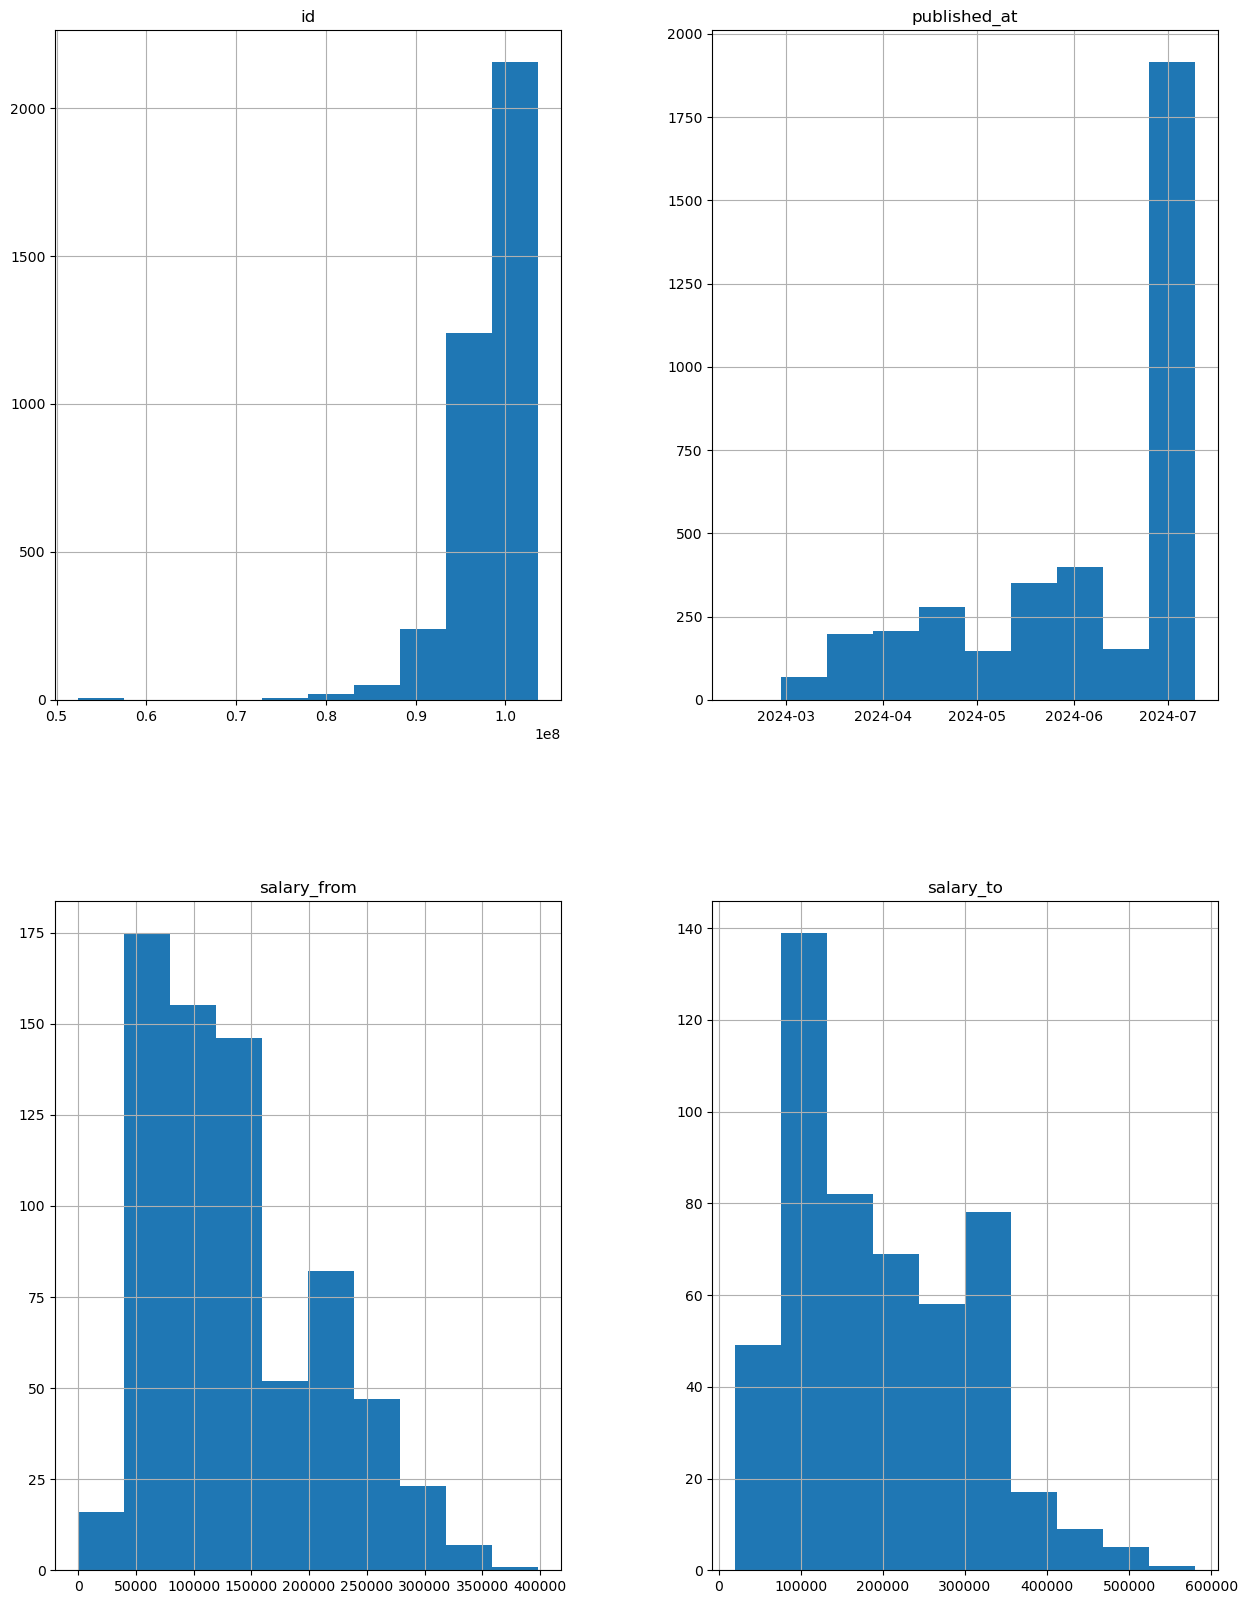

In [13]:
hh_db.hist(figsize=(15,20), bins=10)

### ВЫВОД:

Всего в выгрузке после соединения таблиц 3716 строк.

Пропуски в столбцах department - 76%  - будут заменены на unknown
81% и 86% пропусках в столбцах salary_from и salary_to соответственно, при этом столбец salary_bin заполнен.
key_skills_from_key_skills_field    36.302476 %
hard_skills_from_description        73.412271 %
soft_skills_from_description        45.775027 %
При этом столбец key_skills не содержит пропусков.

Аномальных числовых значений на гистограммах не выявлено. Salary_from начинается от 0. Это либо ошибка, либо речь идет о бесплатной стажировке.

Дата публикация вакансий март - июль 2024, наибольшее количество вакансий опубликовано в июле 2024 года.


### Предобработка данных

#### Заполнение пропусков, проверка на дубликаты - явные и неявные

In [17]:
#роверим столбцы на неявные дубликаты
hh_db['type'].unique()

array(['Открытая'], dtype=object)

In [18]:
hh_db['employer'].unique()

array(['DNS Головной офис', 'Комус', 'Х5 Group', ..., 'Фармстандарт',
       'Газпром межрегионгаз инжиниринг', 'Novabev Group'], dtype=object)

In [19]:
hh_db['department'].unique()

array([nan, 'X5 GROUP, Центральный офис', 'билайн: ИТ, Data, Digital',
       'Сбер для экспертов', '«МТС» ', 'Ozon Офис и Коммерция',
       'Северсталь. IT & Digital',
       'Гринатом. Многофункциональный Центр Обслуживания. Закупки и логистика',
       'Яндекс.Маркет', 'Сбер. IT', 'ГК Иннотех | Финтех (Иннотех)',
       'Яндекс', 'ГК Иннотех | Интеграция Консалтинг', 'VK',
       'Сбер. Data Science', 'ПАО «Промсвязьбанк», ИТ',
       'ПАО «Газпром нефть» ИТ', 'ПАО ВТБ, Технологический блок',
       'Группа компаний «Group4Media», Управляющая компания',
       '«МТС» Кибербезопасность', 'Леруа Мерлен. Центральный офис', 'ИТ',
       'ГК Иннотех | Большие данные', 'ВкусВилл. Офис', 'Rambler&Co',
       'Триколор Вещание и бэк-офис', 'Газпромбанк', 'Ozon Fintech',
       'Лента, федеральная розничная сеть, IT ',
       'Компания «СПОРТМАСТЕР», Sportmaster Lab', '«МТС» КИОН',
       'Московский Кредитный Банк. Профессионалы',
       'ПАО ВТБ, Подразделения Поддержки и Контроля',
     

In [20]:
#заменим nan значения в столбце department на unknown
hh_db['department'] = hh_db['department'].fillna('unknown')

In [21]:
#проверим на неявные дубликаты
hh_db['area'].sort_values().unique()

array(['Абакан', 'Адлер', 'Адыгейск', 'Алтайское', 'Апатиты', 'Артем',
       'Астрахань', 'Байбек', 'Балашиха', 'Барнаул', 'Белгород',
       'Белорецк', 'Брянск', 'Вейделевка', 'Великие Луки', 'Вельск',
       'Верхняя Пышма', 'Владивосток', 'Владимир', 'Волгоград', 'Вологда',
       'Воронеж', 'Геленджик', 'Горно-Алтайск',
       'Дзержинск (Нижегородская область)', 'Дзержинский', 'Дмитров',
       'Дубна', 'Екатеринбург', 'Златоуст',
       'Иваново (Ивановская область)', 'Ижевск', 'Иннополис', 'Иркутск',
       'Йошкар-Ола', 'Казань', 'Калининград', 'Калуга', 'Кемерово',
       'Киров (Кировская область)', 'Кольчугино', 'Королев', 'Кострома',
       'Красногорск', 'Краснодар', 'Красноярск', 'Курган', 'Курск',
       'Липецк', 'Луховицы', 'Магнитогорск', 'Майкоп', 'Москва', 'Муром',
       'Мытищи', 'Набережные Челны', 'Нефтекамск', 'Нижний Новгород',
       'Новокузнецк', 'Новосибирск', 'Новочеркасск', 'Одинцово', 'Омск',
       'Орел', 'Оренбург', 'Пенза', 'Пермь', 'Петрозаводск'

In [22]:
#количество вакансий по городам
hh_db.groupby('area')['area'].agg('count').sort_values(ascending=False).head(15)

area
Москва             2381
Санкт-Петербург     404
Екатеринбург        111
Новосибирск          82
Казань               80
Нижний Новгород      66
Краснодар            51
Владивосток          42
Самара               40
Ростов-на-Дону       34
Воронеж              31
Пермь                29
Тюмень               25
Челябинск            24
Томск                20
Name: area, dtype: int64

In [23]:
#введем новый столбец, отражающий категорию города: Москва, Санкт-Петербург, Регионы.
#так как зарплатные ожидание отличаются, новый столбец поможет нам более точно заполнить пропуски по зарплатным ожиданиям

def categorize_area(city):
   if city == 'Москва':
       return 'Москва'
   elif city == 'Санкт-Петербург':
        return 'Санкт-Петербург'
   else: 
        return 'Регионы'

In [24]:
hh_db['area_category'] = hh_db['area'].apply(categorize_area)

In [25]:
hh_db['area_category'].unique()

array(['Регионы', 'Москва', 'Санкт-Петербург'], dtype=object)

In [26]:
#проверим на неявные дубликаты столбец experience
hh_db['experience'].sort_values().unique()

array(['Junior (no experince)', 'Junior+ (1-3 years)',
       'Middle (3-6 years)', 'Senior (6+ years)'], dtype=object)

In [27]:
#проверим на неявные дубликаты столбец schedule
hh_db['schedule'].sort_values().unique()

array(['Гибкий график', 'Полный день', 'Сменный график',
       'Удаленная работа'], dtype=object)

In [28]:
#проверим на неявные дубликаты столбец eemployment
hh_db['employment'].sort_values().unique()

array(['Полная занятость', 'Проектная работа', 'Стажировка',
       'Частичная занятость'], dtype=object)

In [29]:
#проверим на неявные дубликаты столбец salary_bin
hh_db['salary_bin'].sort_values().unique()

array(['Больше 300 тысяч', 'ЗП не указана', 'Меньше 100 тысяч',
       'От 100 тысяч до 200 тысяч', 'От 200 тысяч до 300 тысяч'],
      dtype=object)

#### Заполнение пропусков столбцов, связанных с зарплатными ожиданиями

In [31]:
#проверим, есть ли аномальные значения в столбцах со значениями нижней границы зарплаты
hh_db.query('salary_from.isna() != True').describe()

id                   published_at    salary_from  \
count  7.040000e+02                            704     704.000000   
mean   9.930854e+07  2024-06-05 19:15:17.154829312  132074.703125   
min    7.308636e+07            2024-03-06 10:23:07      50.000000   
25%    9.682093e+07     2024-05-13 12:04:33.500000   75000.000000   
50%    1.000602e+08     2024-06-27 11:39:34.500000  120000.000000   
75%    1.027189e+08  2024-07-07 12:01:33.249999872  181750.000000   
max    1.035839e+08            2024-07-09 12:38:43  398000.000000   
std    3.687451e+06                            NaN   72442.604165   

           salary_to  
count     353.000000  
mean   184721.730878  
min     20000.000000  
25%     92000.000000  
50%    160000.000000  
75%    255000.000000  
max    497500.000000  
std    104988.274084

In [32]:
sns.boxplot(x='experience', y='salary_from', data=hh_db.query('salary_from.isna() != True'), order=hh_db['experience'].unique())
plt.subplots_adjust(bottom=0.6, top=1)
plt.title('нижняя граница зарплаты')
plt.show()
sns.boxplot(x='experience', y='salary_to', data =hh_db.query('salary_to.isna() != True'), order=hh_db['experience'].unique())
plt.subplots_adjust(bottom=0.6, top=1)
plt.title('верхняя границы зарплаты')
plt.show()

In [33]:
#посмотри на границы зарплат в категории Junior (no experince)
hh_db.query('salary_from.isna() != True | salary_to.isna() != True  & experience == "Junior (no experince)"').describe()

id                   published_at    salary_from  \
count  7.200000e+02                            720     704.000000   
mean   9.929449e+07  2024-06-05 14:24:18.981944576  132074.703125   
min    7.308636e+07            2024-03-06 10:23:07      50.000000   
25%    9.682093e+07     2024-05-13 09:19:05.500000   75000.000000   
50%    1.000511e+08            2024-06-27 11:05:04  120000.000000   
75%    1.027189e+08  2024-07-07 11:49:24.750000128  181750.000000   
max    1.035839e+08            2024-07-09 12:38:43  398000.000000   
std    3.720771e+06                            NaN   72442.604165   

           salary_to  
count     369.000000  
mean   181920.788618  
min     20000.000000  
25%     90000.000000  
50%    150000.000000  
75%    250000.000000  
max    497500.000000  
std    105985.590611

In [34]:
#посмотрим на выбросы нижней границы зарплаты меньше нижней границы
hh_db.query('salary_from < 20000')

id            category  \
1110  96943446     Аналитик данных   
3271  91944373  Системный аналитик   

                                                   name        published_at  \
1110  Аналитик данных в отдел развития на маркетплейсах 2024-05-11 21:45:07   
3271                   Системный Аналитик Middle/Senior 2024-07-06 15:14:38   

                       alternate_url      type                  employer  \
1110  https://hh.ru/vacancy/96943446  Открытая  Репетуев Иван Дмитриевич   
3271  https://hh.ru/vacancy/91944373  Открытая                Datanomica   

     department    area             experience  ...        employment  \
1110    unknown  Москва  Junior (no experince)  ...  Полная занятость   
3271    unknown  Москва      Senior (6+ years)  ...  Полная занятость   

                                            description  \
1110  ищу в команду аналитика до глубины мозга косте...   
3271  привет! мы — ооо «датаномика», решаем проблемы...   

                                 description_lemmatized salary_from salary_to  \
1110  искать команда аналитик глубина мозг кость име...        50.0  100001.0   
3271  привет датаномика решать проблема структуриров...       280.0  340000.0   

                     salary_bin  \
1110  От 100 тысяч до 200 тысяч   
3271           Больше 300 тысяч   

                       key_skills_from_key_skills_field  \
1110  Аналитика продаж, Конкурентная аналитика, Анал...   
3271       JSON API, XML, JSON, Agile, Java, SQL, Kafka   

     hard_skills_from_description soft_skills_from_description area_category  
1110                          NaN                          NaN        Москва  
3271   confluence, Юнит-экономика                          NaN        Москва  

[2 rows x 22 columns]

In [35]:
#изменим значения salary_from на тысячи
hh_db.loc[(hh_db['salary_from'] < 20000), 'salary_from'] =hh_db.loc[(hh_db['salary_from'] < 20000), 'salary_from']*1000

In [36]:
#посмотрим на максимальные выбросы нижней границы зарплаты для Junior (no experince)
hh_db.query('salary_from > 100000 & experience == "Junior (no experince)"')

id            category  \
1587   98869956     Аналитик данных   
1613   98946980     Аналитик данных   
2042  101661009  Системный аналитик   
2406  102908517  Системный аналитик   

                                               name        published_at  \
1587                            Junior Data Analyst 2024-06-10 03:29:33   
1613                                Аналитик данных 2024-05-14 16:29:48   
2042  Аналитик (Системный аналитик/Бизнес аналитик) 2024-07-07 17:19:34   
2406                         Системный аналитик RTB 2024-07-07 10:58:17   

                        alternate_url      type       employer department  \
1587   https://hh.ru/vacancy/98869956  Открытая      BlockShop    unknown   
1613   https://hh.ru/vacancy/98946980  Открытая     Совкомбанк    unknown   
2042  https://hh.ru/vacancy/101661009  Открытая  Корпорация ДМ    unknown   
2406  https://hh.ru/vacancy/102908517  Открытая  ProfIT Family    unknown   

                 area             experience  ...        employment  \
1587  Санкт-Петербург  Junior (no experince)  ...  Проектная работа   
1613           Казань  Junior (no experince)  ...  Полная занятость   
2042           Москва  Junior (no experince)  ...  Полная занятость   
2406           Москва  Junior (no experince)  ...  Полная занятость   

                                            description  \
1587  dn institute, a non-profit research institute,...   
1613  обязанности:  работа с массивами данных в бд m...   
2042  обязанности и задачи  анализ и документировани...   
2406  привет! profitfamily - мы крупнейшая в снг ком...   

                                 description_lemmatized salary_from salary_to  \
1587  dn institute a non profit research institute i...    112200.0       NaN   
1613  обязанность работа массив данные бд ms sql под...    140000.0       NaN   
2042  обязанность задача анализ документирование биз...    160000.0       NaN   
2406  привет profitfamily крупный снг компания сфера...    300000.0       NaN   

         salary_bin                   key_skills_from_key_skills_field  \
1587  ЗП не указана  Английский язык, Project management, Анализ да...   
1613  ЗП не указана                                                NaN   
2042  ЗП не указана                                                NaN   
2406  ЗП не указана  SQL, Анализ данных, Базы данных, Работа с боль...   

     hard_skills_from_description soft_skills_from_description  \
1587               Юнит-экономика                 Документация   
1613                          NaN                          NaN   
2042                          NaN                 Документация   
2406                   confluence                          NaN   

        area_category  
1587  Санкт-Петербург  
1613          Регионы  
2042           Москва  
2406           Москва  

[4 rows x 22 columns]

In [37]:
#посмотрим на максимальные выбросы нижней границы зарплаты для Junior+ (1-3 years)
hh_db.query('salary_from > 260000 & experience == "Junior+ (1-3 years)"')

id            category  \
1391   98014404     Аналитик данных   
2249  102611337  Системный аналитик   
3083  103536939  Системный аналитик   

                                              name        published_at  \
1391          Аналитик данных в Блок "Сеть продаж" 2024-06-10 15:29:45   
2249                         Системный IT аналитик 2024-07-06 16:38:51   
3083  Системный аналитик (ИТ-продуктовая компания) 2024-07-08 20:17:21   

                        alternate_url      type        employer  \
1391   https://hh.ru/vacancy/98014404  Открытая            СБЕР   
2249  https://hh.ru/vacancy/102611337  Открытая        AMarkets   
3083  https://hh.ru/vacancy/103536939  Открытая  Vital Partners   

              department             area           experience  ...  \
1391  Сбер для экспертов           Москва  Junior+ (1-3 years)  ...   
2249             unknown  Санкт-Петербург  Junior+ (1-3 years)  ...   
3083             unknown           Москва  Junior+ (1-3 years)  ...   

            employment                                        description  \
1391  Полная занятость  управление зарплатных проектов в поиске аналит...   
2249  Полная занятость  мы - международная fintech компания amarkets, ...   
3083  Полная занятость  наш клиент: продуктовая it аккредитованная ком...   

                                 description_lemmatized salary_from salary_to  \
1391  управление зарплатной проект поиск аналитика д...    300000.0       NaN   
2249  международный fintech компания amarkets 2 7 го...    261800.0       NaN   
3083  наш клиент продуктовый it аккредитовать компан...    350000.0  400000.0   

            salary_bin                   key_skills_from_key_skills_field  \
1391     ЗП не указана                                                NaN   
2249     ЗП не указана  SQL, Базы данных, UML, BPMN, Системный анализ,...   
3083  Больше 300 тысяч          REST, SQL, UML, PostgreSQL, Анализ данных   

     hard_skills_from_description soft_skills_from_description  \
1391                          NaN                          NaN   
2249                          NaN                 Документация   
3083                          NaN                          NaN   

        area_category  
1391           Москва  
2249  Санкт-Петербург  
3083           Москва  

[3 rows x 22 columns]

In [38]:
#посмотрим на максимальные выбросы нижней границы зарплаты для Senior (6+ years)
hh_db.query('salary_from > 340000 & experience == "Senior (6+ years)"')

id            category  \
2604  103084243  Системный аналитик   
2761  103227680  Системный аналитик   

                                                name        published_at  \
2604  Системный аналитик (в продуктовую ИТ-компанию) 2024-07-01 22:13:15   
2761                        Системный аналитик (ДБО) 2024-07-03 15:23:12   

                        alternate_url      type        employer department  \
2604  https://hh.ru/vacancy/103084243  Открытая  Vital Partners    unknown   
2761  https://hh.ru/vacancy/103227680  Открытая        АйТиКвик    unknown   

                 area         experience  ...        employment  \
2604  Санкт-Петербург  Senior (6+ years)  ...  Полная занятость   
2761  Санкт-Петербург  Senior (6+ years)  ...  Полная занятость   

                                            description  \
2604  наш клиент: продуктовая it аккредитованная ком...   
2761  находимся в поиске sr системного аналитика с о...   

                                 description_lemmatized salary_from salary_to  \
2604  наш клиент продуктовый it аккредитовать компан...    350000.0  420000.0   
2761  находиться поиск sr системный аналитик опыт дб...    350000.0  450000.0   

            salary_bin                   key_skills_from_key_skills_field  \
2604  Больше 300 тысяч  REST, SQL, UML, Анализ данных, Camunda, Kafka,...   
2761  Больше 300 тысяч  Системный анализ, SQL, REST, API, Atlassian Ji...   

     hard_skills_from_description soft_skills_from_description  \
2604                          NaN                          NaN   
2761                   confluence                 Документация   

        area_category  
2604  Санкт-Петербург  
2761  Санкт-Петербург  

[2 rows x 22 columns]

In [39]:
#что делать со строками, у которых заполнено salary_to, но не заполнен salary_from
hh_db.query('salary_to.isna() !=True & salary_from.isna() == True').head()

id         category             name        published_at  \
16  100087368  Аналитик данных     Data Analyst 2024-05-24 15:42:07   
28  100248730  Аналитик данных     Data analyst 2024-06-09 19:52:31   
29  100248731  Аналитик данных     Data analyst 2024-06-09 19:52:31   
34  100305607  Аналитик данных    Дата аналитик 2024-05-27 09:28:44   
68  100446663  Аналитик данных  Аналитик данных 2024-05-28 07:22:36   

                      alternate_url      type                  employer  \
16  https://hh.ru/vacancy/100087368  Открытая                      ЮТИМ   
28  https://hh.ru/vacancy/100248730  Открытая  Дартс рекрутинг сервисез   
29  https://hh.ru/vacancy/100248731  Открытая  Дартс рекрутинг сервисез   
34  https://hh.ru/vacancy/100305607  Открытая                Livemaster   
68  https://hh.ru/vacancy/100446663  Открытая                     Точка   

   department             area           experience  ...        employment  \
16    unknown           Москва  Junior+ (1-3 years)  ...  Полная занятость   
28    unknown  Санкт-Петербург   Middle (3-6 years)  ...  Полная занятость   
29    unknown           Москва   Middle (3-6 years)  ...  Полная занятость   
34    unknown         Смоленск  Junior+ (1-3 years)  ...  Полная занятость   
68    unknown           Москва   Middle (3-6 years)  ...  Полная занятость   

                                          description  \
16  международное рекламное агентство обязанности:...   
28  что такое onecell.ai мы хотим изменить мир и п...   
29  что такое onecell.ai мы хотим изменить мир и п...   
34  привет, мы — ярмарка мастеров! it — экосистема...   
68  ищем аналитиков в точку. мы — финтех-компания,...   

                               description_lemmatized salary_from salary_to  \
16  международный рекламный агентство обязанность ...         NaN  200000.0   
28  onecell ai хотеть изменять мир поэтому делать ...         NaN  140000.0   
29  onecell ai хотеть изменять мир поэтому делать ...         NaN  140000.0   
34  привет ярмарка мастер it экосистема сфера креа...         NaN   80000.0   
68  искать аналитик точка финтех компания создават...         NaN  300000.0   

                   salary_bin  \
16  От 200 тысяч до 300 тысяч   
28  От 100 тысяч до 200 тысяч   
29  От 100 тысяч до 200 тысяч   
34           Меньше 100 тысяч   
68           Больше 300 тысяч   

                     key_skills_from_key_skills_field  \
16  Data Analysis, Python, SQL, Power BI, Английск...   
28                                                NaN   
29                                                NaN   
34                                                NaN   
68                                        SQL, Python   

   hard_skills_from_description soft_skills_from_description    area_category  
16                       Pandas                          NaN           Москва  
28                       Pandas                          NaN  Санкт-Петербург  
29                       Pandas                          NaN           Москва  
34                       Pandas                          NaN          Регионы  
68                          NaN                          NaN           Москва  

[5 rows x 22 columns]

In [40]:
#для таких вакансий установим, что salary_to == salary_from
hh_db.loc[(hh_db['salary_from'].isna() == True) & (hh_db['salary_to'].isna() != True), 'salary_from'] = \
hh_db.loc[(hh_db['salary_from'].isna() == True) & (hh_db['salary_to'].isna() != True), 'salary_to'] 

In [41]:
#что делать со строками, у которых заполнено salary_from, но не заполнен salary_to
hh_db.query('salary_to.isna() ==True & salary_from.isna() != True').head()

id         category                                    name  \
0  100039284  Аналитик данных  Junior аналитик данных (исследователь)   
2  100042705  Аналитик данных         Аналитик данных (исследователь)   
6  100060772  Аналитик данных                         Аналитик данных   
8  100069821  Аналитик данных                         Аналитик данных   
9  100071014  Аналитик данных                         Аналитик данных   

         published_at                    alternate_url      type  \
0 2024-05-24 09:37:04  https://hh.ru/vacancy/100039284  Открытая   
2 2024-05-24 10:01:25  https://hh.ru/vacancy/100042705  Открытая   
6 2024-05-24 11:56:20  https://hh.ru/vacancy/100060772  Открытая   
8 2024-06-10 16:49:49  https://hh.ru/vacancy/100069821  Открытая   
9 2024-06-07 11:08:22  https://hh.ru/vacancy/100071014  Открытая   

                                      employer department          area  \
0                            DNS Головной офис    unknown   Владивосток   
2                            DNS Головной офис    unknown   Владивосток   
6  ГКУ Центр занятости населения города Москвы    unknown        Москва   
8                                          МТС     «МТС»         Казань   
9                                 Россети Урал    unknown  Екатеринбург   

              experience  ...        employment  \
0  Junior (no experince)  ...  Полная занятость   
2    Junior+ (1-3 years)  ...  Полная занятость   
6    Junior+ (1-3 years)  ...  Полная занятость   
8    Junior+ (1-3 years)  ...  Полная занятость   
9    Junior+ (1-3 years)  ...  Полная занятость   

                                         description  \
0  наше направление занимается повышением эффекти...   
2  наше направление занимается повышением эффекти...   
6  один из ключевых партнеров центра занятости на...   
8  мтс — это мультисервисная цифровая экосистема....   
9  пао «россети урал» — крупнейшая электросетевая...   

                              description_lemmatized salary_from salary_to  \
0  наш направление заниматься повышение эффективн...     60000.0       NaN   
2  наш направление заниматься повышение эффективн...     90000.0       NaN   
6  ключевой партнер центр занятость население раб...    100000.0       NaN   
8  мтс мультисервисный цифровой экосистема создав...     72000.0       NaN   
9  россеть урал крупный электросетевой компания у...     51000.0       NaN   

      salary_bin               key_skills_from_key_skills_field  \
0  ЗП не указана                    SQL, Power BI, Python, СУБД   
2  ЗП не указана  SQL, Power BI, Python, СУБД, BPMN, Clickhouse   
6  ЗП не указана                                            NaN   
8  ЗП не указана                                            NaN   
9  ЗП не указана                                            NaN   

  hard_skills_from_description soft_skills_from_description area_category  
0                          NaN                          NaN       Регионы  
2                          NaN                          NaN       Регионы  
6                          NaN                          NaN        Москва  
8                          NaN                          NaN       Регионы  
9                          NaN       Аналитическое мышление       Регионы  

[5 rows x 22 columns]

In [42]:
#посмотрим, насколько в среднем верхняя граница выже ниже границы зарплаты для вакансий с различным опытом
hh_db.query('salary_from.isna() !=True & salary_to.isna() != True').\
pivot_table(index=['experience'], values=['salary_from', 'salary_to'], aggfunc=['count','mean', 'median'])

count                     mean                 \
                      salary_from salary_to    salary_from      salary_to   
experience                                                                  
Junior (no experince)          72        72   72472.847222   85861.750000   
Junior+ (1-3 years)           233       233  122339.656652  153398.626609   
Middle (3-6 years)            193       193  220760.424870  272160.072539   
Senior (6+ years)               9         9  256666.666667  335555.555556   

                           median            
                      salary_from salary_to  
experience                                   
Junior (no experince)     70000.0   80000.0  
Junior+ (1-3 years)      103000.0  140000.0  
Middle (3-6 years)       200000.0  280000.0  
Senior (6+ years)        280000.0  340000.0

In [43]:
#для расчета кожффициента будем использовать медиану границ зарплат
koef_to_from = round((hh_db.query('salary_from.isna() !=True & salary_to.isna() != True').groupby(['experience'])['salary_to'].agg(['median']))/\
(hh_db.query('salary_from.isna() !=True & salary_to.isna() != True').groupby(['experience'])['salary_from'].agg(['median'])),2).reset_index()
koef_to_from

experience  median
0  Junior (no experince)    1.14
1    Junior+ (1-3 years)    1.36
2     Middle (3-6 years)    1.40
3      Senior (6+ years)    1.21

In [44]:
for s in  hh_db['experience'].unique():
     try:
         hh_db.loc[(hh_db['experience'] == s)&(hh_db['salary_from'].isna() != True) &(hh_db['salary_to'].isna() == True), 'salary_to'] =\
         hh_db.loc[(hh_db['experience'] == s)&(hh_db['salary_from'].isna() != True) &(hh_db['salary_to'].isna() == True), 'salary_from']\
         *(koef_to_from.loc[(koef_to_from['experience'] == s), 'median'].values)
     except:
            pass

In [45]:
#проверим результат
hh_db.iloc[[0,2,6,8,9]]

id         category                                    name  \
0  100039284  Аналитик данных  Junior аналитик данных (исследователь)   
2  100042705  Аналитик данных         Аналитик данных (исследователь)   
6  100060772  Аналитик данных                         Аналитик данных   
8  100069821  Аналитик данных                         Аналитик данных   
9  100071014  Аналитик данных                         Аналитик данных   

         published_at                    alternate_url      type  \
0 2024-05-24 09:37:04  https://hh.ru/vacancy/100039284  Открытая   
2 2024-05-24 10:01:25  https://hh.ru/vacancy/100042705  Открытая   
6 2024-05-24 11:56:20  https://hh.ru/vacancy/100060772  Открытая   
8 2024-06-10 16:49:49  https://hh.ru/vacancy/100069821  Открытая   
9 2024-06-07 11:08:22  https://hh.ru/vacancy/100071014  Открытая   

                                      employer department          area  \
0                            DNS Головной офис    unknown   Владивосток   
2                            DNS Головной офис    unknown   Владивосток   
6  ГКУ Центр занятости населения города Москвы    unknown        Москва   
8                                          МТС     «МТС»         Казань   
9                                 Россети Урал    unknown  Екатеринбург   

              experience  ...        employment  \
0  Junior (no experince)  ...  Полная занятость   
2    Junior+ (1-3 years)  ...  Полная занятость   
6    Junior+ (1-3 years)  ...  Полная занятость   
8    Junior+ (1-3 years)  ...  Полная занятость   
9    Junior+ (1-3 years)  ...  Полная занятость   

                                         description  \
0  наше направление занимается повышением эффекти...   
2  наше направление занимается повышением эффекти...   
6  один из ключевых партнеров центра занятости на...   
8  мтс — это мультисервисная цифровая экосистема....   
9  пао «россети урал» — крупнейшая электросетевая...   

                              description_lemmatized salary_from salary_to  \
0  наш направление заниматься повышение эффективн...     60000.0   68400.0   
2  наш направление заниматься повышение эффективн...     90000.0  122400.0   
6  ключевой партнер центр занятость население раб...    100000.0  136000.0   
8  мтс мультисервисный цифровой экосистема создав...     72000.0   97920.0   
9  россеть урал крупный электросетевой компания у...     51000.0   69360.0   

      salary_bin               key_skills_from_key_skills_field  \
0  ЗП не указана                    SQL, Power BI, Python, СУБД   
2  ЗП не указана  SQL, Power BI, Python, СУБД, BPMN, Clickhouse   
6  ЗП не указана                                            NaN   
8  ЗП не указана                                            NaN   
9  ЗП не указана                                            NaN   

  hard_skills_from_description soft_skills_from_description area_category  
0                          NaN                          NaN       Регионы  
2                          NaN                          NaN       Регионы  
6                          NaN                          NaN        Москва  
8                          NaN                          NaN       Регионы  
9                          NaN       Аналитическое мышление       Регионы  

[5 rows x 22 columns]

In [46]:
#проверим, как распределяются незаполнные строки salary_from или sallary_to по salary_bin 	
hh_db.query('salary_from.isna() | salary_to.isna()').pivot_table(index=['salary_bin'], values=['id'], aggfunc='count')

id
salary_bin         
ЗП не указана  2858

Так как все пропущенный значения этих стобцов попали в ЗП не указана, заменим пропущенные значения salary_from и salary_to с учетом столбца experience и area_category, и далее изменим значение ЗП не указана в соответствии с нижний и верхней границей зарплаты. 

In [48]:
hh_db.query('salary_from.isna() == True').groupby(['experience', 'area_category'])['id'].count()

experience             area_category  
Junior (no experince)  Москва              57
                       Регионы             44
                       Санкт-Петербург     11
Junior+ (1-3 years)    Москва             946
                       Регионы            393
                       Санкт-Петербург    157
Middle (3-6 years)     Москва             892
                       Регионы            184
                       Санкт-Петербург    130
Senior (6+ years)      Москва              38
                       Регионы              3
                       Санкт-Петербург      3
Name: id, dtype: int64

In [49]:
#Посмотрим на распределение этих показателей с учетом категории регионов
hh_db.query('salary_from.isna() != True').\
pivot_table(index=['experience'], columns=['area_category'], values=['salary_from', 'salary_to'], \
            aggfunc={"salary_from":['count', 'median'], "salary_to":['median']})

salary_from                                              \
                            count                            median             
area_category              Москва Регионы Санкт-Петербург    Москва   Регионы   
experience                                                                      
Junior (no experince)          41      61              14   70000.0   60000.0   
Junior+ (1-3 years)           220     178              49  130000.0   80000.0   
Middle (3-6 years)            179      65              38  250000.0  150000.0   
Senior (6+ years)               8       3               2  200000.0  200000.0   

                                      salary_to                            
                                         median                            
area_category         Санкт-Петербург    Москва   Регионы Санкт-Петербург  
experience                                                                 
Junior (no experince)         75000.0   80000.0   80000.0         82750.0  
Junior+ (1-3 years)          120000.0  166600.0  108800.0        150000.0  
Middle (3-6 years)           200000.0  300000.0  200000.0        256000.0  
Senior (6+ years)            350000.0  295000.0  242000.0        435000.0

In [50]:
##Для Junior (no experince) и Senior (6+ years) заполним прпоущенные значения с без учета региона,
##так как количество заполненные значений по регионам не велико.
for ex in  ['Junior (no experince)', 'Senior (6+ years)']:
    try: 
        hh_db.loc[(hh_db['experience'] == ex) & (hh_db['salary_from'].isna()), 'salary_from'] = \
        hh_db.loc[(hh_db['experience'] == ex), 'salary_from'].median()
        hh_db.loc[(hh_db['experience'] == ex) & (hh_db['salary_to'].isna()), 'salary_to'] = \
        hh_db.loc[(hh_db['experience'] == ex), 'salary_to'].median()
    except:
        pass

In [51]:
hh_db.query('salary_from.isna() == True').groupby(['experience', 'area_category'])['id'].count()

experience           area_category  
Junior+ (1-3 years)  Москва             946
                     Регионы            393
                     Санкт-Петербург    157
Middle (3-6 years)   Москва             892
                     Регионы            184
                     Санкт-Петербург    130
Name: id, dtype: int64

In [52]:
#Для Junior+ (1-3 years) и Middle (3-6 years) заменим значения с учетом укрупненного региона
for ex in  ['Junior+ (1-3 years)', 'Middle (3-6 years)']:
    for ar in hh_db['area_category'].unique():
        try: 
            hh_db.loc[(hh_db['experience'] == ex) & (hh_db['area_category'] == ar) & (hh_db['salary_from'].isna()), 'salary_from'] = \
            hh_db.loc[(hh_db['experience'] == ex) & (hh_db['area_category'] == ar), 'salary_from'].median()
            hh_db.loc[(hh_db['experience'] == ex) & (hh_db['area_category'] == ar) & (hh_db['salary_to'].isna()), 'salary_to'] = \
            hh_db.loc[(hh_db['experience'] == ex) & (hh_db['area_category'] == ar), 'salary_to'].median()
        except:
            pass

In [53]:
hh_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3716 entries, 0 to 3715
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                3716 non-null   int64         
 1   category                          3716 non-null   object        
 2   name                              3716 non-null   object        
 3   published_at                      3716 non-null   datetime64[ns]
 4   alternate_url                     3716 non-null   object        
 5   type                              3716 non-null   object        
 6   employer                          3716 non-null   object        
 7   department                        3716 non-null   object        
 8   area                              3716 non-null   object        
 9   experience                        3716 non-null   object        
 10  key_skills                        3716 non-null 

In [54]:
#проверим, по какому принципу заполняется колонка salary_bin 	
hh_db.groupby('salary_bin')[['salary_from', 'salary_to']].max()

salary_from  salary_to
salary_bin                                       
Больше 300 тысяч              580000.0   580000.0
ЗП не указана                 350000.0   490000.0
Меньше 100 тысяч               99500.0    99500.0
От 100 тысяч до 200 тысяч     195000.0   195000.0
От 200 тысяч до 300 тысяч     298000.0   298000.0

In [55]:
#проверим, по какому принципу заполняется колонка salary_bin 	
hh_db.groupby('salary_bin')[['salary_from', 'salary_to']].min()

salary_from  salary_to
salary_bin                                       
Больше 300 тысяч              120000.0   300000.0
ЗП не указана                  30000.0    39900.0
Меньше 100 тысяч               20000.0    20000.0
От 100 тысяч до 200 тысяч      35500.0   100000.0
От 200 тысяч до 300 тысяч      50000.0   200000.0

In [56]:
#выгрузим 15 записей для их дальнейшей проверки
hh_db.query('salary_bin == "ЗП не указана"').head(10)

id         category                                    name  \
0  100039284  Аналитик данных  Junior аналитик данных (исследователь)   
1  100039480  Аналитик данных                         Аналитик данных   
2  100042705  Аналитик данных         Аналитик данных (исследователь)   
3  100046788  Аналитик данных                 Ведущий аналитик данных   
4  100056244  Аналитик данных                         Аналитик данных   
5  100059110  Аналитик данных   Senior Data Analyst (Цифровой билайн)   
6  100060772  Аналитик данных                         Аналитик данных   
7  100069131  Аналитик данных                           Дата аналитик   
8  100069821  Аналитик данных                         Аналитик данных   
9  100071014  Аналитик данных                         Аналитик данных   

         published_at                    alternate_url      type  \
0 2024-05-24 09:37:04  https://hh.ru/vacancy/100039284  Открытая   
1 2024-05-24 09:39:00  https://hh.ru/vacancy/100039480  Открытая   
2 2024-05-24 10:01:25  https://hh.ru/vacancy/100042705  Открытая   
3 2024-05-24 10:28:18  https://hh.ru/vacancy/100046788  Открытая   
4 2024-05-24 11:27:40  https://hh.ru/vacancy/100056244  Открытая   
5 2024-06-11 11:45:29  https://hh.ru/vacancy/100059110  Открытая   
6 2024-05-24 11:56:20  https://hh.ru/vacancy/100060772  Открытая   
7 2024-05-24 13:05:01  https://hh.ru/vacancy/100069131  Открытая   
8 2024-06-10 16:49:49  https://hh.ru/vacancy/100069821  Открытая   
9 2024-06-07 11:08:22  https://hh.ru/vacancy/100071014  Открытая   

                                      employer                  department  \
0                            DNS Головной офис                     unknown   
1                                        Комус                     unknown   
2                            DNS Головной офис                     unknown   
3                                     Х5 Group  X5 GROUP, Центральный офис   
4                                       ЛУКОЙЛ                     unknown   
5                                       билайн   билайн: ИТ, Data, Digital   
6  ГКУ Центр занятости населения города Москвы                     unknown   
7                                         СБЕР          Сбер для экспертов   
8                                          МТС                      «МТС»    
9                                 Россети Урал                     unknown   

              area             experience  ...        employment  \
0      Владивосток  Junior (no experince)  ...  Полная занятость   
1           Москва  Junior (no experince)  ...  Полная занятость   
2      Владивосток    Junior+ (1-3 years)  ...  Полная занятость   
3           Москва    Junior+ (1-3 years)  ...  Полная занятость   
4           Москва     Middle (3-6 years)  ...  Полная занятость   
5           Москва     Middle (3-6 years)  ...  Полная занятость   
6           Москва    Junior+ (1-3 years)  ...  Полная занятость   
7  Санкт-Петербург    Junior+ (1-3 years)  ...  Полная занятость   
8           Казань    Junior+ (1-3 years)  ...  Полная занятость   
9     Екатеринбург    Junior+ (1-3 years)  ...  Полная занятость   

                                         description  \
0  наше направление занимается повышением эффекти...   
1  сегодня комус один из крупнейших поставщиков о...   
2  наше направление занимается повышением эффекти...   
3  задачи:  разработка бизнес-моделей для группов...   
4  обязанности:  участие в проектировании, разраб...   
5  сегодня билайн — компания изменений, чутко реа...   
6  один из ключевых партнеров центра занятости на...   
7  команда данных по инвестиционным продуктам. мы...   
8  мтс — это мультисервисная цифровая экосистема....   
9  пао «россети урал» — крупнейшая электросетевая...   

                              description_lemmatized salary_from salary_to  \
0  наш направление заниматься повышение эффективн...     60000.0   68400.0   
1  сегодня комус крупный поставщик офисный товар ...     66500.0   80000.0  

In [57]:
#заменим значение ЗП не указана в соответстви и принципом заполнения salary_bin
# функция для определения категории salary_bin по нижней и верхней границе зарплаты
def categorize_salary (sfrom, sto):
    try:
        if sfrom < 100000 and sto < 100000:
            return 'Меньше 100 тысяч'
        elif  sfrom >= 300000 or sto >= 300000:
            return 'Больше 300 тысяч'
        elif 100000 <=sfrom < 200000 or 100000 <=sto < 200000:
            return 'От 100 тысяч до 200 тысяч'
        elif  200000 <=sfrom < 300000 or 200000 <=sto < 300000:
            return 'От 200 тысяч до 300 тысяч'     
    except:
        pass

In [58]:
hh_db.groupby('salary_bin')[['id']].count()

id
salary_bin                     
Больше 300 тысяч            110
ЗП не указана              3209
Меньше 100 тысяч            109
От 100 тысяч до 200 тысяч   171
От 200 тысяч до 300 тысяч   117

In [59]:
hh_db['salary_bin'] = hh_db['salary_bin'].replace(['ЗП не указана'], np.nan)

In [60]:
#применяем функцию и определяем уровень цен для точек, у которых известен middle_avg_bill
hh_db['salary_bin'].fillna(hh_db.apply(lambda row: categorize_salary(row['salary_from'], row['salary_to']), axis=1),  inplace=True)

In [61]:
#проверяем работу функции
hh_db.head(10)

id         category                                    name  \
0  100039284  Аналитик данных  Junior аналитик данных (исследователь)   
1  100039480  Аналитик данных                         Аналитик данных   
2  100042705  Аналитик данных         Аналитик данных (исследователь)   
3  100046788  Аналитик данных                 Ведущий аналитик данных   
4  100056244  Аналитик данных                         Аналитик данных   
5  100059110  Аналитик данных   Senior Data Analyst (Цифровой билайн)   
6  100060772  Аналитик данных                         Аналитик данных   
7  100069131  Аналитик данных                           Дата аналитик   
8  100069821  Аналитик данных                         Аналитик данных   
9  100071014  Аналитик данных                         Аналитик данных   

         published_at                    alternate_url      type  \
0 2024-05-24 09:37:04  https://hh.ru/vacancy/100039284  Открытая   
1 2024-05-24 09:39:00  https://hh.ru/vacancy/100039480  Открытая   
2 2024-05-24 10:01:25  https://hh.ru/vacancy/100042705  Открытая   
3 2024-05-24 10:28:18  https://hh.ru/vacancy/100046788  Открытая   
4 2024-05-24 11:27:40  https://hh.ru/vacancy/100056244  Открытая   
5 2024-06-11 11:45:29  https://hh.ru/vacancy/100059110  Открытая   
6 2024-05-24 11:56:20  https://hh.ru/vacancy/100060772  Открытая   
7 2024-05-24 13:05:01  https://hh.ru/vacancy/100069131  Открытая   
8 2024-06-10 16:49:49  https://hh.ru/vacancy/100069821  Открытая   
9 2024-06-07 11:08:22  https://hh.ru/vacancy/100071014  Открытая   

                                      employer                  department  \
0                            DNS Головной офис                     unknown   
1                                        Комус                     unknown   
2                            DNS Головной офис                     unknown   
3                                     Х5 Group  X5 GROUP, Центральный офис   
4                                       ЛУКОЙЛ                     unknown   
5                                       билайн   билайн: ИТ, Data, Digital   
6  ГКУ Центр занятости населения города Москвы                     unknown   
7                                         СБЕР          Сбер для экспертов   
8                                          МТС                      «МТС»    
9                                 Россети Урал                     unknown   

              area             experience  ...        employment  \
0      Владивосток  Junior (no experince)  ...  Полная занятость   
1           Москва  Junior (no experince)  ...  Полная занятость   
2      Владивосток    Junior+ (1-3 years)  ...  Полная занятость   
3           Москва    Junior+ (1-3 years)  ...  Полная занятость   
4           Москва     Middle (3-6 years)  ...  Полная занятость   
5           Москва     Middle (3-6 years)  ...  Полная занятость   
6           Москва    Junior+ (1-3 years)  ...  Полная занятость   
7  Санкт-Петербург    Junior+ (1-3 years)  ...  Полная занятость   
8           Казань    Junior+ (1-3 years)  ...  Полная занятость   
9     Екатеринбург    Junior+ (1-3 years)  ...  Полная занятость   

                                         description  \
0  наше направление занимается повышением эффекти...   
1  сегодня комус один из крупнейших поставщиков о...   
2  наше направление занимается повышением эффекти...   
3  задачи:  разработка бизнес-моделей для группов...   
4  обязанности:  участие в проектировании, разраб...   
5  сегодня билайн — компания изменений, чутко реа...   
6  один из ключевых партнеров центра занятости на...   
7  команда данных по инвестиционным продуктам. мы...   
8  мтс — это мультисервисная цифровая экосистема....   
9  пао «россети урал» — крупнейшая электросетевая...   

                              description_lemmatized salary_from salary_to  \
0  наш направление заниматься повышение эффективн...     60000.0   68400.0   
1  сегодня комус крупный поставщик офисный товар ...     66500.0   80000.0  

#### Проверим, есть ли неявные дубликаты в названиях компаний

Посомтрим, какие встречаются названия на примере больших компаний, имеющих различнын бренды

In [64]:
hh_db.query('employer.str.contains("Сбер") == True')['employer'].sort_values().unique()

array(['Негосударственный Пенсионный Фонд Сбербанка',
       'СК Сбербанк страхование жизни', 'СберЗдоровье', 'СберЛизинг',
       'СберМаркет', 'СберМаркетинг', 'СберМобайл', 'СберОбразование',
       'СберСити', 'СберСпасибо',
       'Страховая компания Сбербанк страхование'], dtype=object)

In [65]:
hh_db.query('employer.str.contains("Ростелеком") == True')['employer'].sort_values().unique()

array(['Ростелеком', 'Ростелеком - Центры обработки данных',
       'Ростелеком Башкортостан', 'Ростелеком Информационные Технологии'],
      dtype=object)

In [66]:
hh_db.query('employer.str.contains("Яндекс") == True')['employer'].sort_values().unique()

array(['Яндекс', 'Яндекс Практикум'], dtype=object)

In [67]:
hh_db.query('employer.str.contains("Газпром") == True')['employer'].sort_values().unique()

array(['Газпром', 'Газпром межрегионгаз инжиниринг', 'Газпром нефть',
       'Газпром трансгаз Томск', 'Газпром энергосбыт Тюмень',
       'Газпромбанк', 'Газпромбанк Автолизинг', 'Оператор Газпром ИД',
       'Электронная торговая площадка Газпромбанка'], dtype=object)

Судя по полученным результатам, данные компании действительно являются самостоятельными, поэтому считаем, что неявных дубликатов в названиях компаний нет.

#### Ключевые навыки skills  - заполнение пропусков и определение категории навыков: hard или soft

In [70]:
#пропущенные значения в поле key_skills_from_key_skills_field
hh_db.query('key_skills_from_key_skills_field.isna() == True').groupby('key_skills')[['id']].count().sort_values(by='id',ascending=False).head(20)

id
key_skills                                             
[]                                                  512
['Документация']                                    255
['confluence', 'Документация']                      115
['Pandas']                                           84
['confluence']                                       62
['Коммуникация']                                     56
['Аналитическое мышление']                           55
['Документация', 'Коммуникация']                     41
['confluence', 'Документация', 'Коммуникация']       26
['Документация', 'Аналитическое мышление']           18
['confluence', 'Pandas']                              7
['Коммуникация', 'Pandas']                            7
['Юнит-экономика']                                    7
['Аналитическое мышление', 'Pandas']                  7
['confluence', 'Коммуникация']                        6
['Аналитическое мышление', 'Документация', 'Ком...    5
['Документация', 'confluence', 'Коммуникация']        5
['Аналитическое мышление', 'Креативность']            5
['Документация', 'Проактивность']                     4
['Проактивность']                                     4

In [71]:
hh_db.query('key_skills_from_key_skills_field.isna() == True')[['key_skills', 'key_skills_from_key_skills_field']].head(25)

key_skills  \
4                                    ['Документация']   
6                                                  []   
7   ['Документация', 'Проактивность', 'Коммуникация']   
8                                                  []   
9                          ['Аналитическое мышление']   
10                                         ['Pandas']   
14                                                 []   
15                                                 []   
18                     ['confluence', 'Документация']   
21                                                 []   
28                                         ['Pandas']   
29                                         ['Pandas']   
31                                                 []   
34                                         ['Pandas']   
35                                                 []   
36         ['Аналитическое мышление', 'Креативность']   
38                                                 []   
39                                   ['Документация']   
40                                                 []   
41                                                 []   
45                                                 []   
46                                   ['Документация']   
49                                         ['Pandas']   
50                                   ['Коммуникация']   
51                                                 []   

   key_skills_from_key_skills_field  
4                               NaN  
6                               NaN  
7                               NaN  
8                               NaN  
9                               NaN  
10                              NaN  
14                              NaN  
15                              NaN  
18                              NaN  
21                              NaN  
28                              NaN  
29                              NaN  
31                              NaN  
34                              NaN  
35                              NaN  
36                              NaN  
38                              NaN  
39                              NaN  
40                              NaN  
41                              NaN  
45                              NaN  
46                              NaN  
49                              NaN  
50                              NaN  
51                              NaN

In [72]:
hh_db.query('key_skills_from_key_skills_field.isna() != True')[['key_skills', 'key_skills_from_key_skills_field']].head(25)

key_skills  \
0               ['Power BI', 'СУБД', 'Python', 'SQL']   
1    ['MS SQL', 'Работа с базами данных', 'MS Excel']   
2   ['SQL', 'Power BI', 'СУБД', 'Python', 'Clickho...   
3   ['Анализ данных', 'Коммуникация', 'SQL', 'MS O...   
5      ['Python', 'SQL', 'Математическая статистика']   
11  ['Linux', 'SQL', 'Бизнес-анализ', 'Hadoop', 'B...   
12  ['Linux', 'SQL', 'поведение пользователей', 'D...   
13  ['Анализ данных', 'Проактивность', 'SQL', 'Pyt...   
16  ['Английский язык', 'MS SQL', 'SQL', 'Power BI...   
17  ['Анализ данных', 'MS SQL', 'Python', 'Работа ...   
19  ['Python', 'Коммуникация', 'SQL', 'Торговая пл...   
20                   ['Python', 'SQL', 'Маркетплейс']   
22  ['SQL', 'Python', 'Математическая статистика',...   
23  ['SQL', 'A/B тесты', 'Python', 'Data Analysis'...   
24                                            ['SQL']   
25  ['Deep Learning', 'PyTorch', 'Python', 'OpenCV...   
26  ['Анализ данных', 'Администрирование базы данн...   
27  ['Анализ данных', 'Статистический анализ', 'SQ...   
30                  ['SQL-запросы', 'JIRA', 'Python']   
32                         ['Power BI', 'SQL', 'DWH']   
33  ['SQL', 'DAX', 'Работа с базами данных', 'MS E...   
37  ['Анализ данных', 'Визуализация данных', 'Подг...   
42  ['MS SQL', 'витрины данных', 'Phyton', 'Анализ...   
43  ['Numpy', 'Python', 'pandas', 'Data Analysis',...   
44  ['репутационный маркетинг', 'WEB аналитика', '...   

                     key_skills_from_key_skills_field  
0                         SQL, Power BI, Python, СУБД  
1            Работа с базами данных, MS SQL, MS Excel  
2       SQL, Power BI, Python, СУБД, BPMN, Clickhouse  
3   MS Office, SQL, Python, Hadoop, Нive, Аналитич...  
5              Python, SQL, Математическая статистика  
11  Python, SQL, Обучение и развитие, Data Mining,...  
12  SQL, PostgreSQL, Python, MS Excel, LTV, AppsFl...  
13  SQL, Python, Airflow, Анализ данных, Базы данн...  
16  Data Analysis, Python, SQL, Power BI, Английск...  
17  MS Excel, Аналитика, Анализ данных, Аналитичес...  
19                     SQL, Python, Торговая площадка  
20                           SQL, Python, Маркетплейс  
22  SQL, Python, Математическая статистика, Торгов...  
23          Python, SQL, Data Analysis, BI, A/B тесты  
24                                                SQL  
25  OpenCV, Python, Deep Learning, Аналитическое м...  
26  MS Excel, Анализ данных, Аналитика, Администри...  
27  SQL, Анализ данных, Статистический анализ, Мат...  
30                          JIRA, Python, SQL-запросы  
32                                 SQL, DWH, Power BI  
33    SQL, DAX, Работа с базами данных, VBA, MS Excel  
37  MS Excel, Прогнозирование, Аналитика, Системно...  
42  MS SQL, Phyton, Анализ бизнес показателей, вит...  
43               Data Analysis, Python, Numpy, pandas  
44  репутационный маркетинг, WEB аналитика, Google...

In [73]:
hh_db['key_skills_from_key_skills_field'] = hh_db['key_skills_from_key_skills_field'].fillna(hh_db['key_skills'])

In [74]:
hh_db.iloc[[4,6,7,8,9]]

id         category             name        published_at  \
4  100056244  Аналитик данных  Аналитик данных 2024-05-24 11:27:40   
6  100060772  Аналитик данных  Аналитик данных 2024-05-24 11:56:20   
7  100069131  Аналитик данных    Дата аналитик 2024-05-24 13:05:01   
8  100069821  Аналитик данных  Аналитик данных 2024-06-10 16:49:49   
9  100071014  Аналитик данных  Аналитик данных 2024-06-07 11:08:22   

                     alternate_url      type  \
4  https://hh.ru/vacancy/100056244  Открытая   
6  https://hh.ru/vacancy/100060772  Открытая   
7  https://hh.ru/vacancy/100069131  Открытая   
8  https://hh.ru/vacancy/100069821  Открытая   
9  https://hh.ru/vacancy/100071014  Открытая   

                                      employer          department  \
4                                       ЛУКОЙЛ             unknown   
6  ГКУ Центр занятости населения города Москвы             unknown   
7                                         СБЕР  Сбер для экспертов   
8                                          МТС              «МТС»    
9                                 Россети Урал             unknown   

              area           experience  ...        employment  \
4           Москва   Middle (3-6 years)  ...  Полная занятость   
6           Москва  Junior+ (1-3 years)  ...  Полная занятость   
7  Санкт-Петербург  Junior+ (1-3 years)  ...  Полная занятость   
8           Казань  Junior+ (1-3 years)  ...  Полная занятость   
9     Екатеринбург  Junior+ (1-3 years)  ...  Полная занятость   

                                         description  \
4  обязанности:  участие в проектировании, разраб...   
6  один из ключевых партнеров центра занятости на...   
7  команда данных по инвестиционным продуктам. мы...   
8  мтс — это мультисервисная цифровая экосистема....   
9  пао «россети урал» — крупнейшая электросетевая...   

                              description_lemmatized salary_from salary_to  \
4  обязанность участие проектирование разработка ...    250000.0  300000.0   
6  ключевой партнер центр занятость население раб...    100000.0  136000.0   
7  команда данные инвестиционный продукт развиват...    120000.0  150000.0   
8  мтс мультисервисный цифровой экосистема создав...     72000.0   97920.0   
9  россеть урал крупный электросетевой компания у...     51000.0   69360.0   

                  salary_bin  \
4           Больше 300 тысяч   
6  От 100 тысяч до 200 тысяч   
7  От 100 тысяч до 200 тысяч   
8           Меньше 100 тысяч   
9           Меньше 100 тысяч   

                    key_skills_from_key_skills_field  \
4                                   ['Документация']   
6                                                 []   
7  ['Документация', 'Проактивность', 'Коммуникация']   
8                                                 []   
9                         ['Аналитическое мышление']   

  hard_skills_from_description               soft_skills_from_description  \
4                          NaN                               Документация   
6                          NaN                                        NaN   
7                          NaN  Коммуникация, Документация, Проактивность   
8                          NaN                                        NaN   
9                          NaN                     Аналитическое мышление   

     area_category  
4           Москва  
6           Москва  
7  Санкт-Петербург  
8          Регионы  
9          Регионы  

[5 rows x 22 columns]

In [75]:
#заменяем пропуски значений
hh_db['key_skills_from_key_skills_field'] = hh_db['key_skills_from_key_skills_field'].replace(['[]'],['Нет информации'])

In [76]:
#убираем лишние знаки препинания
hh_db['key_skills_from_key_skills_field'] = hh_db['key_skills_from_key_skills_field'].str.translate({ord(i): None for i in "'[]"})

In [77]:
# заменим пропуски на Нет информации в hard_skills_from_description  и  soft_skills_from_description
hh_db['hard_skills_from_description'] = hh_db['hard_skills_from_description'].fillna('Нет информации')
hh_db['soft_skills_from_description'] = hh_db['soft_skills_from_description'].fillna('Нет информации')

In [78]:
#Чтобы упростить обработку данных, изменим регистр всех скилзов на нижний в трех основных столбцах с навыками

hh_db['key_skills_from_key_skills_field'] = hh_db['key_skills_from_key_skills_field'].str.lower()
hh_db['hard_skills_from_description'] = hh_db['hard_skills_from_description'].str.lower()
hh_db['soft_skills_from_description'] = hh_db['soft_skills_from_description'].str.lower()

In [79]:
hh_db.groupby('key_skills_from_key_skills_field')[['id']].count().sort_values(by='id',ascending=False).head(20)

id
key_skills_from_key_skills_field                       
нет информации                                      512
документация                                        255
confluence, документация                            115
pandas                                               84
confluence                                           62
аналитическое мышление                               58
коммуникация                                         56
документация, коммуникация                           41
sql, python                                          35
confluence, документация, коммуникация               26
документация, аналитическое мышление                 18
uml, bpmn, sql, rest, soap, rabbitmq, kafka          16
sql                                                  15
python, sql                                          13
python, sql, a/b тесты                               10
sql, apache kafka, uml, bpmn, scrum, ms sql          10
sql, retail, system analysis, базы данных, сист...    9
sql, ms sql, базы данных, dwh, power bi, анализ...    9
sql, python, a/b тесты                                9
системный анализ, 1с программирование, 1с: пред...    8

In [80]:
#пропущенные значения в поле key_skills_from_key_skills_field
hh_db.groupby('hard_skills_from_description')[['id']].count().sort_values(by='id',ascending=False)

id
hard_skills_from_description      
нет информации                2728
confluence                     636
pandas                         266
юнит-экономика                  39
pandas, confluence              30
confluence, юнит-экономика       9
pandas, юнит-экономика           4
google sheets                    2
pandas, google sheets            1
математическая статистика        1

In [81]:
hh_db.groupby('soft_skills_from_description')[['id']].count().sort_values(by='id',ascending=False)

id
soft_skills_from_description                            
нет информации                                      1701
документация                                        1168
коммуникация, документация                           213
коммуникация                                         175
аналитическое мышление                               148
документация, аналитическое мышление                  89
проактивность                                         33
документация, проактивность                           29
документация, переговоры                              22
проактивность, аналитическое мышление                 15
коммуникация, документация, аналитическое мышление    15
коммуникация, проактивность                           10
коммуникация, аналитическое мышление                  10
коммуникация, переговоры                               8
переговоры                                             8
коммуникация, документация, переговоры                 6
коммуникация, документация, проактивность              6
креативность, аналитическое мышление                   6
креативность                                           5
документация, креативность                             5
принятие решений                                       4
адаптивность                                           4
документация, проактивность, переговоры                3
документация, проактивность, креативность              3
коммуникация, переговоры, аналитическое мышление       3
коммуникация, адаптивность                             2
тайм-менеджмент                                        2
коммуникация, критическое мышление                     2
документация, переговоры, аналитическое мышление       2
коммуникация, решение проблем, презентация резу...     2
решение проблем, принятие решений                      1
решение проблем                                        1
тайм-менеджмент, документация                          1
тайм-менеджмент, документация, проактивность, п...     1
коммуникация, документация, проактивность, пере...     1
коммуникация, тайм-менеджмент, креативность, ан...     1
коммуникация, решение проблем, критическое мышл...     1
коммуникация, решение проблем                          1
коммуникация, проактивность, креативность              1
коммуникация, письменная коммуникация, документ...     1
коммуникация, документация, проактивность, анал...     1
коммуникация, документация, презентация результ...     1
коммуникация, документация, креативность               1
документация, эмпатия, аналитическое мышление          1
документация, проактивность, аналитическое мышл...     1
документация, креативность, аналитическое мышление     1
эмпатия                                                1

In [82]:
hh_db.query('key_skills_from_key_skills_field != "нет информации"')[['hard_skills_from_description','soft_skills_from_description']]

hard_skills_from_description soft_skills_from_description
0                  нет информации               нет информации
1                  нет информации               нет информации
2                  нет информации               нет информации
3          pandas, юнит-экономика                 коммуникация
4                  нет информации                 документация
...                           ...                          ...
3710               нет информации               нет информации
3711               нет информации   коммуникация, документация
3712               нет информации                 документация
3714                   confluence               нет информации
3715               нет информации                 документация

[3204 rows x 2 columns]

In [83]:
#изменим название столбца key_skills_from_key_skills_field на all_skills для удобства в дальнейшем работе
hh_db = hh_db.rename(columns={'key_skills_from_key_skills_field':'all_skills'})

In [84]:
#проверим, есть ли навыки из hard_skills  в общих навыкахю Если есть, то скорее всего.
# в дальнейшем можно будет перенести все скилы в хард, и уже оттуда исключить софт
mask = hh_db.apply(lambda x: str(x["hard_skills_from_description"]) in str(x["all_skills"]), axis=1) 
hh_db[mask].query('all_skills != "нет информации"')

id            category  \
10    100077503     Аналитик данных   
12    100080002     Аналитик данных   
18    100097062     Аналитик данных   
28    100248730     Аналитик данных   
29    100248731     Аналитик данных   
...         ...                 ...   
3677   99549541  Системный аналитик   
3679   99557686  Системный аналитик   
3683   99579827  Системный аналитик   
3685   99610144  Системный аналитик   
3701   99806817  Системный аналитик   

                                                   name        published_at  \
10                                         Data Analyst 2024-05-24 14:14:00   
12                  Продуктовый аналитик / Data Analyst 2024-06-11 14:34:15   
18                                         Data analyst 2024-05-24 17:05:00   
28                                         Data analyst 2024-06-09 19:52:31   
29                                         Data analyst 2024-06-09 19:52:31   
...                                                 ...                 ...   
3677                              Junior System Analyst 2024-07-07 12:07:31   
3679                         Старший системный аналитик 2024-07-04 18:30:12   
3683                                 Системный аналитик 2024-07-08 10:18:55   
3685                                 Системный аналитик 2024-06-27 10:53:30   
3701  Ведущий системный аналитик (Личный кабинет сот... 2024-07-08 13:16:15   

                        alternate_url      type                   employer  \
10    https://hh.ru/vacancy/100077503  Открытая                       СБЕР   
12    https://hh.ru/vacancy/100080002  Открытая                  Photo Lab   
18    https://hh.ru/vacancy/100097062  Открытая                       СБЕР   
28    https://hh.ru/vacancy/100248730  Открытая   Дартс рекрутинг сервисез   
29    https://hh.ru/vacancy/100248731  Открытая   Дартс рекрутинг сервисез   
...                               ...       ...                        ...   
3677   https://hh.ru/vacancy/99549541  Открытая                      Aston   
3679   https://hh.ru/vacancy/99557686  Открытая      ЦРТ | Группа компаний   
3683   https://hh.ru/vacancy/99579827  Открытая  ПСБ (ПАО «Промсвязьбанк»)   
3685   https://hh.ru/vacancy/99610144  Открытая               Деко Системс   
3701   https://hh.ru/vacancy/99806817  Открытая                     билайн   

                     department             area           experience  ...  \
10           Сбер для экспертов           Москва   Middle (3-6 years)  ...   
12                      unknown           Москва  Junior+ (1-3 years)  ...   
18           Сбер для экспертов           Москва  Junior+ (1-3 years)  ...   
28                      unknown  Санкт-Петербург   Middle (3-6 years)  ...   
29                      unknown           Москва   Middle (3-6 years)  ...   
...                         ...              ...                  ...  ...   
3677                    unknown           Казань  Junior+ (1-3 years)  ...   
3679                    unknown  Санкт-Петербург   Middle (3-6 years)  ...   
3683    ПАО «Промсвязьбанк», ИТ           Москва   Middle (3-6 years)  ...   
3685                    unknown           Москва   Middle (3-6 years)  ...   
3701  билайн: ИТ, Data, Digital           Москва   Middle (3-6 years)  ...   

            employment                                        description  \
10    Полная занятость  в команду data science ищем руководителя напра...   
12    Полная занятость  making mobile photo editing available to anyon...   
18    Полная занятость  мы, управление зарплатных проектов блока сеть ...   
28    Полная занятость  что такое onecell.ai мы хотим изменить мир и п...   
29    Полная занятость  что такое onecell.ai мы хотим изменить мир и п...   
...                ...                                                ...   
3677  Полная занятость  мы – аутсорсинговая it-компания aston, разраба...   
3679  Полная занятость  наша команда реализует амбициозный проект по р...   
3683  Полная занятость  опис

In [85]:
hh_db[hh_db.apply(lambda x: str("pandas") in str(x["all_skills"]), axis=1)].query('all_skills != "нет информации"').head()

id         category                                 name  \
10  100077503  Аналитик данных                         Data Analyst   
12  100080002  Аналитик данных  Продуктовый аналитик / Data Analyst   
28  100248730  Аналитик данных                         Data analyst   
29  100248731  Аналитик данных                         Data analyst   
34  100305607  Аналитик данных                        Дата аналитик   

          published_at                    alternate_url      type  \
10 2024-05-24 14:14:00  https://hh.ru/vacancy/100077503  Открытая   
12 2024-06-11 14:34:15  https://hh.ru/vacancy/100080002  Открытая   
28 2024-06-09 19:52:31  https://hh.ru/vacancy/100248730  Открытая   
29 2024-06-09 19:52:31  https://hh.ru/vacancy/100248731  Открытая   
34 2024-05-27 09:28:44  https://hh.ru/vacancy/100305607  Открытая   

                    employer          department             area  \
10                      СБЕР  Сбер для экспертов           Москва   
12                 Photo Lab             unknown           Москва   
28  Дартс рекрутинг сервисез             unknown  Санкт-Петербург   
29  Дартс рекрутинг сервисез             unknown           Москва   
34                Livemaster             unknown         Смоленск   

             experience  ...        employment  \
10   Middle (3-6 years)  ...  Полная занятость   
12  Junior+ (1-3 years)  ...  Полная занятость   
28   Middle (3-6 years)  ...  Полная занятость   
29   Middle (3-6 years)  ...  Полная занятость   
34  Junior+ (1-3 years)  ...  Полная занятость   

                                          description  \
10  в команду data science ищем руководителя напра...   
12  making mobile photo editing available to anyon...   
28  что такое onecell.ai мы хотим изменить мир и п...   
29  что такое onecell.ai мы хотим изменить мир и п...   
34  привет, мы — ярмарка мастеров! it — экосистема...   

                               description_lemmatized salary_from salary_to  \
10  команда data science искать руководитель напра...    250000.0  300000.0   
12  making mobile photo editing available to anyon...    135000.0  185000.0   
28  onecell ai хотеть изменять мир поэтому делать ...    140000.0  140000.0   
29  onecell ai хотеть изменять мир поэтому делать ...    140000.0  140000.0   
34  привет ярмарка мастер it экосистема сфера креа...     80000.0   80000.0   

                   salary_bin  \
10           Больше 300 тысяч   
12  От 100 тысяч до 200 тысяч   
28  От 100 тысяч до 200 тысяч   
29  От 100 тысяч до 200 тысяч   
34           Меньше 100 тысяч   

                                           all_skills  \
10                                             pandas   
12  sql, postgresql, python, ms excel, ltv, appsfl...   
28                                             pandas   
29                                             pandas   
34                                             pandas   

   hard_skills_from_description soft_skills_from_description    area_category  
10                       pandas               нет информации           Москва  
12                       pandas               нет информации           Москва  
28                       pandas               нет информации  Санкт-Петербург  
29                       pandas               нет информации           Москва  
34                       pandas               нет информации          Регионы  

[5 rows x 22 columns]

In [86]:
#проверка работы среза по содержанию строки
hh_db.query('all_skills.str.contains("sql") == True')['all_skills'].unique()

array(['sql, power bi, python, субд',
       'работа с базами данных, ms sql, ms excel',
       'sql, power bi, python, субд, bpmn, clickhouse', ...,
       'sql, uml, bpmn, soap, системный анализ, аналитическое мышление, rest, json, json api, api, ui, agile',
       'vba, python, powershell, оптимизация бизнес процессов, системы управления базами данных, аналитический склад ума, разработка технических заданий, автоматизация бизнес-процессов, аналитическое мышление, ms sql',
       'idef, sql, uml, bpmn, разработка технических заданий, системный анализ, rest, бизнес-анализ'],
      dtype=object)

In [87]:
hh_db['all_skills'].str.extract(r"((\w+)sql|sql|[А-Яа-яЁё]+\s+sql|[a-zA-Z]+\s+sql|sql+\s+[А-Яа-яЁё])\b").groupby(by=0).count().sort_values(by=1, ascending = False)

1
0                 
postgresql      60
mysql            3
nosql            2
postgesql        2
hypersonic sql   0
ms sql           0
sql              0
анализ sql       0
знания sql       0
основы sql       0

In [88]:
hh_db['all_skills'] = [i.replace('postgresql', 'sql') for i in hh_db['all_skills']]
hh_db['all_skills'] = [i.replace('mysql', 'sql') for i in hh_db['all_skills']]
hh_db['all_skills'] = [i.replace('postgesql', 'sql') for i in hh_db['all_skills']]
hh_db['all_skills'] = [i.replace('hypersonic sql', 'sql') for i in hh_db['all_skills']]
hh_db['all_skills'] = [i.replace('ms sql', 'sql') for i in hh_db['all_skills']]
hh_db['all_skills'] = [i.replace('анализ sql', 'sql') for i in hh_db['all_skills']]
hh_db['all_skills'] = [i.replace('основы sql', 'sql') for i in hh_db['all_skills']]
hh_db['all_skills'] = [i.replace('знания sql', 'sql') for i in hh_db['all_skills']]
hh_db['all_skills'] = [i.replace('системный sql', 'sql') for i in hh_db['all_skills']]
hh_db['all_skills'] = [i.replace('базовые sql', 'sql') for i in hh_db['all_skills']]

In [89]:
hh_db['all_skills'].str.extract(r"((\w+)sql|sql(\w+)|sql+\s+(\w+)|(\w+)+\s+sql])\b").groupby(by=0).count().sort_values(by=1, ascending = False)

1  2  3  4
0                       
nosql        16  0  0  0
pgsql         3  0  0  0
mssql         2  0  0  0
posgresql     1  0  0  0
sql server    0  0  8  0
sql запросы   0  0  4  0
sqlite        0  2  0  0

In [90]:
hh_db['all_skills'] = [i.replace('pgsql', 'sql') for i in hh_db['all_skills']]
hh_db['all_skills'] = [i.replace('mssql', 'sql') for i in hh_db['all_skills']]
hh_db['all_skills'] = [i.replace('posgresql', 'sql') for i in hh_db['all_skills']]
hh_db['all_skills'] = [i.replace('sql server', 'sql') for i in hh_db['all_skills']]
hh_db['all_skills'] = [i.replace('sql запросы', 'sql') for i in hh_db['all_skills']]
hh_db['all_skills'] = [i.replace('sqlite', 'sql') for i in hh_db['all_skills']]

In [91]:
hh_db['all_skills'].str.extract(r"((\w+)sql|sql(\w+)|sql+\s+(\w+)|(\w+)+\s+sql])\b").groupby(by=0).count().sort_values(by=1, ascending = False)

1  2  3  4
0                 
nosql  16  0  0  0

In [92]:
hh_db['all_skills'].str.extract(r"((\w+)excel|excel|[А-Яа-яЁё]+\s+excel|[a-zA-Z]+\s+excel|excel+\s+[А-Яа-яЁё])\b").groupby(by=0).count().sort_values(by=1, ascending = False)

1
0               
excel          0
ms excel       0
в excel        0
знание excel   0
мс excel       0
таблицы excel  0

In [93]:
#меняем внутри строки значения в столбце
hh_db['all_skills'] = [i.replace('ms excel', 'excel') for i in hh_db['all_skills']]
hh_db['all_skills'] = [i.replace('в excel', 'excel') for i in hh_db['all_skills']]
hh_db['all_skills'] = [i.replace('знание excel', 'excel') for i in hh_db['all_skills']]
hh_db['all_skills'] = [i.replace('мс excel', 'excel') for i in hh_db['all_skills']]
hh_db['all_skills'] = [i.replace('пользователь excel', 'excel') for i in hh_db['all_skills']]
hh_db['all_skills'] = [i.replace('таблицы excel', 'excel') for i in hh_db['all_skills']]
hh_db['all_skills'] = [i.replace('продвинутый excel', 'excel') for i in hh_db['all_skills']]
hh_db['all_skills'] = [i.replace('работа excel', 'excel') for i in hh_db['all_skills']]
hh_db['all_skills'] = [i.replace('сводные excel', 'excel') for i in hh_db['all_skills']]

In [94]:
hh_db['all_skills'].str.extract(r"((\w+)excel|excel|[А-Яа-яЁё]+\s+excel|[a-zA-Z]+\s+excel|excel+\s+[А-Яа-яЁё])\b").groupby(by=0).count().sort_values(by=1, ascending = False)

1
0       
excel  0

In [95]:
hh_db['all_skills'].str.extract(r"([А-Яа-яЁё]+\s+[А-Яа-яЁё]+\s+системн(\w+)+\s+анал(\w+)|системн(\w+)+\s+анал(\w+))\b").groupby(by=0).count()

1  2    3    4
0                                                 
опыт работы системным аналитиком    1  1    0    0
системная аналитика                 0  0    4    4
системный анализ                    0  0  576  576
системный аналитик                  0  0    3    3
экономическое или системный анализ  1  1    0    0

In [96]:
hh_db['all_skills'] = [i.replace('системная аналитика', 'системный анализ') for i in hh_db['all_skills']]
hh_db['all_skills'] = [i.replace('системный аналитик', 'системный анализ') for i in hh_db['all_skills']]
hh_db['all_skills'] = [i.replace('system analysis', 'системный анализ') for i in hh_db['all_skills']]
hh_db['all_skills'] = [i.replace('опыт работы системным аналитиком', 'системный анализ') for i in hh_db['all_skills']]
hh_db['all_skills'] = [i.replace('экономическое или системный анализ', 'системный анализ') for i in hh_db['all_skills']]

In [97]:
hh_db['all_skills'].str.extract(r"(\,+\s+[А-Яа-яЁё]+\s+мышлен(\w+))\b").groupby(by=0).count().sort_values(by=1, ascending = False)

1
0                             
, аналитическое мышление   374
, системное мышление        31
, системность мышления       6
, стратегическое мышление    4
, критическое мышление       2
, гибкость мышления          1
, логическое мышление        1

In [98]:
hh_db['all_skills'] = [i.replace('системность мышления', 'системное мышление') for i in hh_db['all_skills']]
hh_db['all_skills'] = [i.replace('критическое мышление', 'системное мышление') for i in hh_db['all_skills']]
hh_db['all_skills'] = [i.replace('логическое мышление', 'системное мышление') for i in hh_db['all_skills']]
hh_db['all_skills'] = [i.replace('гибкость мышления', 'аналитическое мышление') for i in hh_db['all_skills']]

In [99]:
hh_db['all_skills'].str.extract(r"(google+\s+(\w+)+\s+(\w+)|google+\s+(\w+))\b").groupby(by=0).count()

1  2   3
0                              
google adwords         0  0   1
google analytics       0  0  15
google cloud platform  1  1   0
google data studio     5  5   0
google docs            0  0   9
google sheets          0  0   4

In [100]:
hh_db['all_skills'].str.extract(r"(аналит(\w+)+\s+(\w+)|(\w+)+\s+аналит(\w+)+\s+(\w+))\b").groupby(by=0).count()

1    2  3  4  5
0                                                       
аналитик bi                              1    1  0  0  0
аналитик bpmsoft                         1    1  0  0  0
аналитик данных                          5    5  0  0  0
аналитика больших                        1    1  0  0  0
аналитика данных                        10   10  0  0  0
аналитика закупок                        2    2  0  0  0
аналитика по                             1    1  0  0  0
аналитика продаж                         6    6  0  0  0
аналитика требований                     1    1  0  0  0
аналитические исследования              82   82  0  0  0
аналитические навыки                     2    2  0  0  0
аналитические способности               19   19  0  0  0
аналитический склад                     27   27  0  0  0
аналитическое мышление                 496  496  0  0  0
формирование аналитической отчетности    0    0  1  1  1

In [101]:
hh_db['all_skills'] = [i.replace('аналитик данных', 'аналитика данных') for i in hh_db['all_skills']]
hh_db['all_skills'] = [i.replace('аналитика закупок', 'аналитика данных') for i in hh_db['all_skills']]
hh_db['all_skills'] = [i.replace('аналитика продаж', 'аналитика данных') for i in hh_db['all_skills']]
hh_db['all_skills'] = [i.replace('аналитика больших массивов данных', 'аналитика данных') for i in hh_db['all_skills']]
hh_db['all_skills'] = [i.replace('аналитика больших массивов данных', 'аналитика данных') for i in hh_db['all_skills']]
hh_db['all_skills'] = [i.replace('формирование аналитической отчетности', 'аналитика данных') for i in hh_db['all_skills']]
hh_db['all_skills'] = [i.replace('аналитические исследования', 'аналитика данных') for i in hh_db['all_skills']]
hh_db['all_skills'] = [i.replace('аналитические навыки', 'аналитическое мышление') for i in hh_db['all_skills']]
hh_db['all_skills'] = [i.replace('аналитические способности', 'аналитическое мышление') for i in hh_db['all_skills']]
hh_db['all_skills'] = [i.replace('аналитический склад', 'аналитическое мышление') for i in hh_db['all_skills']]

In [102]:
hh_db['all_skills'].str.extract(r"((\w+)+\s+баз(\w+)+\s+(\w+)|баз(\w+)+\s+(\w+)|субд)\b").groupby(by=0).count()

1    2    3    4    5
0                                                     
администрирование базы данных    1    1    1    0    0
база данных                      0    0    0    5    5
базельские стандарты             0    0    0    1    1
базы данных                      0    0    0  171  171
на базе 1с                      38   38   38    0    0
пространственные базы данных     1    1    1    0    0
реляционные базы данных          2    2    2    0    0
с базами данных                222  222  222    0    0
субд                             0    0    0    0    0
управления базами данных         7    7    7    0    0

In [103]:
hh_db['all_skills'] = [i.replace('администрирование базы данных', 'базы данных') for i in hh_db['all_skills']]
hh_db['all_skills'] = [i.replace('база данных', 'базы данных') for i in hh_db['all_skills']]
hh_db['all_skills'] = [i.replace('пространственные базы данных', 'базы данных') for i in hh_db['all_skills']]
hh_db['all_skills'] = [i.replace('реляционные базы данных', 'базы данных') for i in hh_db['all_skills']]
hh_db['all_skills'] = [i.replace('субд', 'базы данных') for i in hh_db['all_skills']]
hh_db['all_skills'] = [i.replace('работа с базами данных', 'базы данных') for i in hh_db['all_skills']]
hh_db['all_skills'] = [i.replace('cистемы управления базами данных', 'базы данных') for i in hh_db['all_skills']]
hh_db['all_skills'] = [i.replace('система управления базами данных', 'базы данных') for i in hh_db['all_skills']]
hh_db['all_skills'] = [i.replace('системы управления базами данных', 'базы данных') for i in hh_db['all_skills']]

In [104]:
hh_db['all_skills'].str.extract(r"(data+\s+(\w+)|(\w+)+\s+data)\b").groupby(by=0).count()

1   2
0                      
big data          0  46
data analysis   112   0
data analyst      8   0
data base         9   0
data catalog      1   0
data mining       5   0
data science     13   0
data scientist    3   0
data studio       1   0
data vault        3   0
data warehouse    1   0
google data       0   2
yandex data       0   1

In [105]:
hh_db['all_skills'] = [i.replace('data base', 'базы данных') for i in hh_db['all_skills']]
hh_db['all_skills'] = [i.replace('data catalog', 'базы данных') for i in hh_db['all_skills']]
hh_db['all_skills'] = [i.replace('data scientist', 'data science') for i in hh_db['all_skills']]

Регулярные выржание долго обрабатываются Поэтому попробуем другиой способ.

#### Обработка неявных дубликатов через explode

In [108]:
hh_db['all_skills'].count()

3716

In [109]:
hh_db['all_skills'] = hh_db['all_skills'].str.split(",")

In [110]:
hh_db['all_skills'].count()

3716

In [111]:
hh_exp = hh_db.explode('all_skills')
hh_exp.head()

id         category                                    name  \
0  100039284  Аналитик данных  Junior аналитик данных (исследователь)   
0  100039284  Аналитик данных  Junior аналитик данных (исследователь)   
0  100039284  Аналитик данных  Junior аналитик данных (исследователь)   
0  100039284  Аналитик данных  Junior аналитик данных (исследователь)   
1  100039480  Аналитик данных                         Аналитик данных   

         published_at                    alternate_url      type  \
0 2024-05-24 09:37:04  https://hh.ru/vacancy/100039284  Открытая   
0 2024-05-24 09:37:04  https://hh.ru/vacancy/100039284  Открытая   
0 2024-05-24 09:37:04  https://hh.ru/vacancy/100039284  Открытая   
0 2024-05-24 09:37:04  https://hh.ru/vacancy/100039284  Открытая   
1 2024-05-24 09:39:00  https://hh.ru/vacancy/100039480  Открытая   

            employer department         area             experience  ...  \
0  DNS Головной офис    unknown  Владивосток  Junior (no experince)  ...   
0  DNS Головной офис    unknown  Владивосток  Junior (no experince)  ...   
0  DNS Головной офис    unknown  Владивосток  Junior (no experince)  ...   
0  DNS Головной офис    unknown  Владивосток  Junior (no experince)  ...   
1              Комус    unknown       Москва  Junior (no experince)  ...   

         employment                                        description  \
0  Полная занятость  наше направление занимается повышением эффекти...   
0  Полная занятость  наше направление занимается повышением эффекти...   
0  Полная занятость  наше направление занимается повышением эффекти...   
0  Полная занятость  наше направление занимается повышением эффекти...   
1  Полная занятость  сегодня комус один из крупнейших поставщиков о...   

                              description_lemmatized salary_from salary_to  \
0  наш направление заниматься повышение эффективн...     60000.0   68400.0   
0  наш направление заниматься повышение эффективн...     60000.0   68400.0   
0  наш направление заниматься повышение эффективн...     60000.0   68400.0   
0  наш направление заниматься повышение эффективн...     60000.0   68400.0   
1  сегодня комус крупный поставщик офисный товар ...     66500.0   80000.0   

         salary_bin    all_skills hard_skills_from_description  \
0  Меньше 100 тысяч           sql               нет информации   
0  Меньше 100 тысяч      power bi               нет информации   
0  Меньше 100 тысяч        python               нет информации   
0  Меньше 100 тысяч   базы данных               нет информации   
1  Меньше 100 тысяч   базы данных               нет информации   

  soft_skills_from_description area_category  
0               нет информации       Регионы  
0               нет информации       Регионы  
0               нет информации       Регионы  
0               нет информации       Регионы  
1               нет информации        Москва  

[5 rows x 22 columns]

In [112]:
len(hh_exp)

18320

In [113]:
#уберем пробелы в начале строк в skills
hh_exp['all_skills'] = hh_exp['all_skills'].str.strip()

In [114]:
#посмотрим, что плучилось в списке скиллс
hh_exp.groupby('all_skills')['id'].count().sort_values(ascending=False).head(50)

all_skills
sql                                    1875
bpmn                                    656
python                                  629
системный анализ                        616
uml                                     574
аналитическое мышление                  572
базы данных                             559
нет информации                          512
документация                            511
анализ данных                           487
rest                                    394
confluence                              269
soap                                    266
аналитика                               264
excel                                   261
разработка технических заданий          253
работа с большим объемом информации     233
power bi                                231
бизнес-анализ                           227
постановка задач разработчикам          216
xml                                     212
api                                     192
коммуникация         

In [115]:
hh_exp['all_skills'][hh_exp['all_skills'].str.contains(r'office')].unique()

array(['ms office', 'знание ms office',
       'уверенный пользователь пк (ms office)', 'microsoft office'],
      dtype=object)

In [116]:
hh_exp['all_skills'][hh_exp['all_skills'].str.contains(r'статист')].unique()

array(['математическая статистика', 'статистический анализ', 'статистика',
       'медицинская статистика'], dtype=object)

In [117]:
hh_exp['all_skills'].replace(re.compile('.*ms office.*'), 'office', inplace=True)
hh_exp['all_skills'].replace(re.compile('.*microsoft office.*'), 'office', inplace=True)
hh_exp['all_skills'].replace(re.compile('.*статист.*'), 'статистика', inplace=True)

In [118]:
hh_exp['all_skills'] = hh_exp['all_skills'].\
replace(['data analysis', 'сбор и анализ информации', 'аналитика', 'аналитика данных', 'сводные таблицы'],'анализ данных')

In [119]:
hh_exp['all_skills'].replace(re.compile('.*jira.*'), 'jira', inplace=True)
hh_exp['all_skills'].replace(re.compile('.*confluence.*'), 'confluence', inplace=True)
hh_exp['all_skills'].replace(re.compile('.*powerpoint.*'), 'powerpoint', inplace=True)

In [120]:
hh_exp['all_skills'][hh_exp['all_skills'].str.contains(r'бизнес процес')].unique()

array(['управление бизнес процессами', 'оптимизация бизнес процессов',
       'моделирование бизнес процессов', 'описание бизнес процессов'],
      dtype=object)

In [121]:
hh_exp['all_skills'][hh_exp['all_skills'].str.contains(r'бизнес-процес')].unique()

array(['оптимизация бизнес-процессов', 'описание бизнес-процессов',
       'анализ бизнес-процессов', 'моделирование бизнес-процессов',
       'реинжиниринг бизнес-процессов', 'бизнес-процессы',
       'автоматизация бизнес-процессов',
       'анализ и моделирование бизнес-процессов',
       'аудит бизнес-процессов',
       'реализация в битрикс24 бизнес-процессов'], dtype=object)

In [122]:
hh_exp['all_skills'][hh_exp['all_skills'].str.contains(r'бизнес')].unique()

array(['бизнес-анализ', 'анализ бизнес показателей',
       'управление бизнес процессами', 'оптимизация бизнес-процессов',
       'оптимизация бизнес процессов', 'бизнес-модели',
       'описание бизнес-процессов', 'анализ бизнес-процессов',
       'моделирование бизнес процессов', 'бизнес-моделирование',
       'бизнес-аналитика', 'бизнес анализ', 'бизнес-консультирование',
       'бизнес тестирование', 'документирование бизнес-требований',
       'кредиты для бизнеса', 'разработка бизнес-требований',
       'моделирование бизнес-процессов', 'реинжиниринг бизнес-процессов',
       'бизнес-процессы', 'автоматизация бизнес-процессов',
       'анализ и моделирование бизнес-процессов',
       'сбор и анализ бизнес-требований от заказчика',
       'разработка бизнес-модели', 'аудит бизнес-процессов',
       'разработка бизнес-плана',
       'реализация в битрикс24 бизнес-процессов', 'бизнес-требования',
       'описание бизнес процессов', 'бизнес-планирование'], dtype=object)

In [123]:
hh_exp['all_skills'][hh_exp['all_skills'].str.contains(r'требован')].unique()

array(['анализ требований', 'функциональные требования',
       'аналитика требований', 'разработка функциональных требований',
       'управление требованиями', 'документирование бизнес-требований',
       'сбор требований', 'контроль качества требований',
       'разработка бизнес-требований', 'работа с требованиями',
       'разработка нефункциональных требований',
       'спецификация требований',
       'сбор и анализ бизнес-требований от заказчика',
       'ведение задачи от сбора требований',
       'анализ и формализация требований заказчика',
       'нефункциональные требования', 'бизнес-требования',
       'описание системных требований'], dtype=object)

In [124]:
hh_exp[hh_exp['all_skills'].str.contains(r'бизнес-планирование')]

id            category                name        published_at  \
3653  99079987  Системный аналитик  Системный аналитик 2024-07-08 19:23:19   

                       alternate_url      type    employer department  \
3653  https://hh.ru/vacancy/99079987  Открытая  Team Value    unknown   

                 area           experience  ...        employment  \
3653  Санкт-Петербург  Junior+ (1-3 years)  ...  Полная занятость   

                                            description  \
3653  привет! мы - team value - it-интегратор, специ...   

                                 description_lemmatized salary_from salary_to  \
3653  привет team value it интегратор специализирова...    150000.0  150000.0   

                     salary_bin           all_skills  \
3653  От 100 тысяч до 200 тысяч  бизнес-планирование   

     hard_skills_from_description soft_skills_from_description  \
3653                       pandas       аналитическое мышление   

        area_category  
3653  Санкт-Петербург  

[1 rows x 22 columns]

In [125]:
hh_exp[hh_exp['all_skills'].str.contains(r'кредиты для бизнеса')]

id            category  \
2353  102854602  Системный аналитик   

                                                   name        published_at  \
2353  Бизнес/Системный аналитик (Бэк-офис кредитных ... 2024-06-27 14:12:40   

                        alternate_url      type      employer department  \
2353  https://hh.ru/vacancy/102854602  Открытая  Центр Орбита    unknown   

        area          experience  ...        employment  \
2353  Москва  Middle (3-6 years)  ...  Полная занятость   

                                            description  \
2353  центр орбита - ведущий разработчик цифровых ре...   

                                 description_lemmatized salary_from salary_to  \
2353  центр орбита ведущий разработчик цифровой реше...    250000.0  300000.0   

            salary_bin           all_skills hard_skills_from_description  \
2353  Больше 300 тысяч  кредиты для бизнеса                   confluence   

     soft_skills_from_description area_category  
2353   коммуникация, документация        Москва  

[1 rows x 22 columns]

In [126]:
hh_exp['all_skills'] = hh_exp['all_skills'].\
replace(['оптимизация бизнес-процессов', 'описание бизнес-процессов',
       'анализ бизнес-процессов', 'моделирование бизнес-процессов',
       'реинжиниринг бизнес-процессов', 'бизнес-процессы',
       'автоматизация бизнес-процессов', 'аудит бизнес-процессов',
       'реализация в битрикс24 бизнес-процессов','управление бизнес процессами', 'оптимизация бизнес процессов',
       'моделирование бизнес процессов', 'описание бизнес процессов', 'бизнес тестирование',
         'разработка бизнес-модели', 'бизнес-модели', 'бизнес-моделирование', 'бизнес-планирование', 'кредиты для бизнеса', 'оптимизация процессов'],\
        'анализ и моделирование бизнес-процессов')
hh_exp['all_skills'] = hh_exp['all_skills'].\
replace(['юнит-экономика', 'бизнес-анализ','анализ бизнес показателей', 'бизнес анализ', 'бизнес-консультирование', 'разработка бизнес-плана', 'определение метрик'],\
        'бизнес-аналитика')
hh_exp['all_skills'] = hh_exp['all_skills'].\
replace(['анализ требований', 'функциональные требования',
       'аналитика требований', 'разработка функциональных требований',
       'документирование бизнес-требований',
       'сбор требований', 'контроль качества требований',
       'разработка бизнес-требований', 'работа с требованиями',
       'разработка нефункциональных требований',
       'спецификация требований',
       'сбор и анализ бизнес-требований от заказчика',
       'ведение задачи от сбора требований',
       'анализ и формализация требований заказчика',
       'нефункциональные требования', 'бизнес-требования',
       'описание системных требований'],'управление требованиями')

In [127]:
hh_exp['all_skills'][hh_exp['all_skills'].str.contains(r'презента')].unique()

array(['навыки презентации', 'подготовка презентаций',
       'проведение презентаций'], dtype=object)

In [128]:
hh_exp['all_skills'] = hh_exp['all_skills'].\
replace(['навыки презентации', 'подготовка презентаций',
       'проведение презентаций'],'презентации')

In [129]:
hh_exp['all_skills'][hh_exp['all_skills'].str.contains(r'документа')].unique()

array(['документация', 'ведение документации', 'оформление документации',
       'работа с документами', 'медицинская документация',
       'техническая документация',
       'написание документации для пользователей',
       'разработка проектной документации', 'проектная документация',
       'разработка технической документации',
       '‒ умение разрабатывать документацию', 'api документация',
       'разработка и поддерживание в актуальном состоянии проектной документации',
       'разработка документациии', 'работа с документацией',
       'анализ документации'], dtype=object)

In [130]:
hh_exp['all_skills'] = hh_exp['all_skills'].replace(['ведение документации', 'оформление документации',
       'работа с документами', 'медицинская документация', 'написание документации для пользователей', '‒ умение разрабатывать документацию',
        'разработка документациии' 'работа с документацией','анализ документации', 'написание инструкций'],'документация')
hh_exp['all_skills'] = hh_exp['all_skills'].replace(['разработка технической документации', 'api документация'],'техническая документация')
hh_exp['all_skills'] = hh_exp['all_skills'].replace('api документация','api, техническая документация')
hh_exp['all_skills'] = hh_exp['all_skills'].replace(['разработка проектной документации', 'проектная документация', 
'разработка и поддерживание в актуальном состоянии проектной документации', 'разработка проектных документов'], 'проектная документация')

In [131]:
hh_exp['all_skills'][hh_exp['all_skills'].str.contains(r'документо')].unique()

array(['подготовка документов для участия в тендерах',
       '1с: документооборот', 'складской документооборот',
       'электронный документооборот'], dtype=object)

In [132]:
hh_exp['all_skills'] = hh_exp['all_skills'].replace(['1с: документооборот', 'складской документооборот',
       'электронный документооборот','подготовка документов для участия в тендерах'], 'документооборот')

In [133]:
hh_exp['all_skills'][hh_exp['all_skills'].str.contains(r'мышлен')].unique()

array(['аналитическое мышление', 'системное мышление',
       'стратегическое мышление', 'аналитическое мышление ума',
       '‒ системное мышление'], dtype=object)

In [134]:
hh_exp['all_skills'][hh_exp['all_skills'].str.contains(r'стратегич')].unique()

array(['стратегическое мышление'], dtype=object)

In [135]:
hh_exp['all_skills'][hh_exp['all_skills'].str.contains(r'коммуник')].unique()

array(['деловая коммуникация', 'коммуникация', 'коммуникабельность',
       'коммуникативная гибкость', 'развитые коммуникативные навыки',
       'коммуникативные навыки', 'письменная коммуникация',
       'телекоммуникации',
       '• деловая коммуникация • общение с клиентами • работа в условиях многозадачности • опыт работы в ком'],
      dtype=object)

In [136]:
hh_exp['all_skills'][hh_exp['all_skills'].str.contains(r'многозадач')].unique()

array(['работа в условиях многозадачности', 'многозадачность',
       'умение работать в условиях многозадачности',
       'умение работа в условиям многозадачности',
       'работа в режиме многозадачности',
       '• деловая коммуникация • общение с клиентами • работа в условиях многозадачности • опыт работы в ком'],
      dtype=object)

In [137]:
hh_exp['all_skills'] = hh_exp['all_skills'].replace(['аналитическое мышление ума',
       '‒ системное мышление', '• деловая коммуникация • общение с клиентами • работа в условиях многозадачности • опыт работы в ком'],\
                                                    ['аналитическое мышление', 'системное мышление', 'коммуникация'])
hh_exp['all_skills'] = hh_exp['all_skills'].replace(['деловая коммуникация', 'коммуникация', 'коммуникабельность', 'коммуникативная гибкость', 
                                                     'развитые коммуникативные навыки','коммуникативные навыки', 'письменная коммуникация'],
                                                   'коммуникация')
hh_exp['all_skills'] = hh_exp['all_skills'].replace(['работа в условиях многозадачности', 'умение работать в условиях многозадачности',
                                                     'умение работа в условиям многозадачности', 'работа в режиме многозадачности'],'многозадачность')

In [138]:
hh_exp['all_skills'][hh_exp['all_skills'].str.contains(r'agile')].unique()

array(['agile', 'arcgis qgis git/gitlab python базы данных agile',
       'agile project management'], dtype=object)

In [139]:
hh_exp['all_skills'][hh_exp['all_skills'].str.contains(r'scrum')].unique()

array(['scrum'], dtype=object)

In [140]:
hh_exp['all_skills'][hh_exp['all_skills'].str.contains(r'power')].unique()

array(['power bi', 'powerpoint', 'power query', 'power point',
       'ms power bi', 'power pivot', 'powerbi', 'power query)',
       'powershell', 'microsoft power bi', 'powerquery', 'powerbl',
       'bi: visiology/microsoft powerbi', 'powerdesigner'], dtype=object)

In [141]:
hh_exp['all_skills'] = hh_exp['all_skills'].replace(['agile project management', 'scrum'], 'agile')
hh_exp['all_skills'] = hh_exp['all_skills'].replace(['arcgis qgis git/gitlab python базы данных agile'], 'python')
hh_exp['all_skills'] = hh_exp['all_skills'].replace(['ms power bi',  'powerbi', 'microsoft power bi', 'powerbl','bi: visiology/microsoft powerbi', 'bi'], 'power bi')
hh_exp['all_skills'] = hh_exp['all_skills'].replace(['power query)', 'powerquery'], 'power query')
hh_exp['all_skills'] = hh_exp['all_skills'].replace(['power point'], 'powerpoint')

In [142]:
hh_exp['all_skills'][hh_exp['all_skills'].str.contains(r'erp')].unique()

array(['powerpoint', 'erp', 'erp systems', 'erp-системы на базе 1с',
       '1с erp', '1с erp битфинанс', '1с:erp', 'enterprise architect',
       '1с: erp', '1c: erp', '1с: erp управление предприятием', '1с erp)'],
      dtype=object)

In [143]:
hh_exp['all_skills'] = hh_exp['all_skills'].replace(['erp systems'], 'erp')
hh_exp['all_skills'] = hh_exp['all_skills'].replace(['erp-системы на базе 1с', '1с erp)', '1с erp битфинанс', '1с:erp', 
'1с: erp', '1c: erp', '1с: erp управление предприятием'], '1с erp')

In [144]:
hh_exp['all_skills'][hh_exp['all_skills'].str.contains(r'panda')].unique()

array(['pandas', 'panda'], dtype=object)

In [145]:
hh_exp['all_skills'][hh_exp['all_skills'].str.contains(r'1c')].unique()

array(['1c: предприятие', '1c', '1c кадры и бухгалтерия', '1c ка',
       '1c ух'], dtype=object)

In [146]:
hh_exp['all_skills'][hh_exp['all_skills'].str.contains(r'1с')].unique()

array(['1с: предприятие 8', '1с', '1с: торговля', '1с:',
       '1с: предприятие', '1с программирование', '1с: торговля и склад',
       'конфигурирование 1с', 'работа с выставленными счетами в 1с',
       'заведения данных в 1с', 'знание 1с', '1с erp',
       '1с: бухгалтерия и склад', '1с-битрикс', '1с: зарплата и кадры',
       '1с: управление торговлей', '1с: предприятие: розница',
       '1с: управление производственным предприятием', 'интеграция 1с',
       '1с:тоир', '1с: зарплата и управление персоналом', '1с бп',
       '1с: фгис меркурий', '1с: бухгалтерия',
       'обновление конфигурации 1с',
       '1с: предприятие: управление строительной организацией',
       '1с: комплексная автоматизация', 'создание конфигурации 1с',
       '1с: логистика', '1с 8.0', '1с: розница', 'сопровождение 1с',
       '1с: управление холдингом',
       'поддержание и развитие учетных систем 1с',
       'интеграция учетных систем 1с',
       'владение прикладными решениями 1с: (1с бп',
       'зн

In [147]:
hh_exp['all_skills'][hh_exp['all_skills'].str.contains(r'исследов')].unique()

array(['исследования рынка', 'маркетинговые исследования',
       'исследовательский анализ данных', 'социологические исследования',
       'b2b исследования'], dtype=object)

In [148]:
hh_exp['all_skills'] = hh_exp['all_skills'].replace(['panda', 'numpy'], 'pandas')
hh_exp['all_skills'] = hh_exp['all_skills'].replace(['исследовательский анализ данных'], 'анализ данных')
hh_exp['all_skills'] = hh_exp['all_skills'].replace(['исследования рынка', 'социологические исследования','b2b исследования'], 'маркетинговые исследования')
hh_exp['all_skills'] = hh_exp['all_skills'].replace(['1с: предприятие 8', '1с', '1с: торговля', '1с:', '1с: предприятие', '1с программирование', 
'1с: торговля и склад', 'конфигурирование 1с', 'работа с выставленными счетами в 1с','заведения данных в 1с', 'знание 1с', '1с: бухгалтерия и склад', 
'1с-битрикс', '1с: зарплата и кадры',  '1с: управление торговлей', '1с: предприятие: розница', '1с: управление производственным предприятием', 
'интеграция 1с', '1с:тоир', '1с: зарплата и управление персоналом', '1с бп', '1с: фгис меркурий', '1с: бухгалтерия', 'обновление конфигурации 1с', 
'1с: предприятие: управление строительной организацией', '1с: комплексная автоматизация', 'создание конфигурации 1с', '1с: логистика', '1с 8.0', 
'1с: розница', 'сопровождение 1с', '1с: управление холдингом', 'поддержание и развитие учетных систем 1с', 'интеграция учетных систем 1с', 
'владение прикладными решениями 1с: (1с бп', 'знание информационной системы 1с унф', 'оптимизация 1с: ух', 'сопровождение 1с: ух', 
'взаимодействие с разработчиками 1с',  '1с ут11', '1с: управление предприятием', '1с ут 11', '1с 8.3', '1с: бит финанс', 'бит.финанс', 'битрикс 24',
'1c', '1c ка', '1c кадры и бухгалтерия', '1c ух', '1c: предприятие'], '1с')
hh_exp['all_skills'] = hh_exp['all_skills'].replace(['rest api', 'restapi', 'rest ip', 'rest-api', 'rest/web сервисы', 'restful api'], 'rest')
hh_exp['all_skills'] = hh_exp['all_skills'].replace(['excel (vba'], 'vba')   

In [149]:
hh_exp['all_skills'][hh_exp['all_skills'].str.contains(r'разраб')].unique()

array(['постановка задач разработчикам', 'разработка технических заданий',
       'разработка лекарств', 'разработка дэшбордов',
       'разработка и внедрение системы kpi', 'разработка хранилищ',
       'разработка', 'разработка архитектуры it',
       'формирование технического задания для разработки',
       'разработка нового продукта', 'разработка по',
       'разработка логистики', 'разработка регламентов',
       'разработка инструкций', 'разработка функциональных моделей',
       'разработка технических спецификаций', 'разработка документациии',
       'разработка концепции', 'руководство командой разработчиков',
       'разработка архитектуры', 'мобильная разработка',
       'тестирование разработанного функционала',
       'тестирование разработок', 'понимание методов разработки по',
       'разработка web-сервисов'], dtype=object)

In [150]:
hh_exp['all_skills'][hh_exp['all_skills'].str.contains(r'борд')].unique()

array(['дашборды', 'создание дашбордов', 'дашборд',
       'построение дашбордов', 'разработка дэшбордов'], dtype=object)

In [151]:
hh_exp['all_skills'] = hh_exp['all_skills'].replace(['формирование технического задания для разработки', 
                                                     'разработка технических спецификаций'], 'разработка технических заданий')
hh_exp['all_skills'] = hh_exp['all_skills'].replace(['разработка документациии', 'разработка регламентов','разработка инструкций'], 'документация')
hh_exp['all_skills'] = hh_exp['all_skills'].replace(['создание дашбордов', 'дашборд','построение дашбордов', 'разработка дэшбордов'], 'дашборды')

In [152]:
hh_exp['all_skills'][hh_exp['all_skills'].str.contains(r'коман')].unique()

array(['управление командой', 'работа в команде',
       'умение работать в команде', 'руководство командой',
       'руководство командой разработчиков', 'продуктовые команды'],
      dtype=object)

In [153]:
hh_exp['all_skills'] = hh_exp['all_skills'].replace(['умение работать в команде', 'продуктовые команды'], 'работа в команде')
hh_exp['all_skills'] = hh_exp['all_skills'].replace(['руководство командой', 'руководство командой разработчиков'], 'управление командой')
hh_exp['all_skills'] = hh_exp['all_skills'].replace(['apache kafka', 'kafka)'], 'kafka')

In [154]:
hh_exp['all_skills'][hh_exp['all_skills'].str.contains(r'тест')].unique()

array(['a/b тесты', 'тестирование', 'а/бх тесты',
       'проведение тестирований', 'a/b тестирование',
       'функциональное тестирование', 'а/в-тестирования',
       'ab тестирование', 'ревью тест-кейсов', 'участие в тестировании',
       'тестирование баз данных', 'автоматизированное тестирование',
       'системное тестирование',
       'тестирование разработанного функционала',
       'тестирование разработок', 'тестирование программных продуктов',
       'тестирование api', 'интеграционное тестирование',
       'beta-тестирования'], dtype=object)

In [155]:
hh_exp['all_skills'] = hh_exp['all_skills'].replace(['а/бх тесты','a/b тестирование','а/в-тестирования','ab тестирование'], 'a/b тесты')
hh_exp['all_skills'] = hh_exp['all_skills'].replace(['проведение тестирований', 'функциональное тестирование', 'ревью тест-кейсов', 
                                                     'участие в тестировании', 'тестирование баз данных', 'автоматизированное тестирование',
                                                     'системное тестирование', 'тестирование разработанного функционала', 'тестирование разработок', 
                                                     'тестирование программных продуктов', 'тестирование api', 'интеграционное тестирование', 
                                                     'beta-тестирования'], 'тестирование')

In [156]:
hh_exp['all_skills'] = hh_exp['all_skills'].replace(['аналитик', 'анализ', 'агрегатные функции', 'обработка информаци'], 'анализ данных')
hh_exp['all_skills'] = hh_exp['all_skills'].replace(['анализ продукта', 'аналитика по клиентам', 'анализ доходности', 'roi', 'business analysis',
                                                    'подготовка отчетов', 'анализ рынка', 'экономический анализ', 'маркетинговый анализ'], 'бизнес-аналитика')
hh_exp['all_skills'] = hh_exp['all_skills'].replace(['системный анализ','анализ интеграций', 'анализ и документирование информации', 'высшее образование (системный анализ)'], 'системная аналитика')
hh_exp['all_skills'] = hh_exp['all_skills'].replace(['анти фрод', 'аналитик bi', 'аналитик bpmsoft', 'автоматизация etl', 'аналитик creatio', 'базель', 
                                                     'python3', 'postman / swagger', 'gitlab', 'oracle pl/sql'], ['антифрод', 'power bi', 'bpmn', 'etl', 'cretio', 
                                                                                       'базельские стандарты', 'python', 'postman', 'git', 'sql'])
hh_exp['all_skills'] = hh_exp['all_skills'].replace(['английский — a1 — начальный', 'английский — b1 — средний',
                                                     'английский – а2', 'английский язык (upper-intermediate)'], 'английский язык')
hh_exp['all_skills'] = hh_exp['all_skills'].replace(['автоматизация медицинских процессов', 'автоматизация процессов тмц', 
                                                     'автоматизация процессов управления персоналом', 'автоматизация управленческой отчетности'], 
                                                    'автоматизация и оптимизация процессов')
hh_exp['all_skills'] = hh_exp['all_skills'].replace(['анализ абс', 'абс', 'абс цфт'], 'абс')
hh_exp['all_skills'] = hh_exp['all_skills'].replace(['брокер', 'брокеры сообщений', 'брокеры сообщений (rabbit', 'rabbit mq', 'брокер сообщений'], 'rabbitmq')
hh_exp['all_skills'] = hh_exp['all_skills'].replace(['xml/json', 'xml/xsd', 'xsd-схемы', 'xslt'], 'xsd/xslt')
hh_exp['all_skills'] = hh_exp['all_skills'].replace(['soapui', 'soap ui', 'rest/soap', 'soap api'], 'soap')
hh_exp['all_skills'] = hh_exp['all_skills'].replace(['машинное обучение', 'классическое машинное обучение','deep learning', 'mashine learning'], 'machine learning')
hh_exp['all_skills'] = hh_exp['all_skills'].replace(['обучаемость', 'обучение', 'желание обучаться','обучение и развитие'], 'готовность обучаться')

In [157]:
hh_exp['all_skills'][hh_exp['all_skills'].str.contains(r'обуч')].unique()

array(['готовность обучаться'], dtype=object)

In [158]:
hh_exp['all_skills'][hh_exp['all_skills'].str.contains(r'learning')].unique()

array(['machine learning'], dtype=object)

In [159]:
#Посмотрим на оставшиеся навыки
len(hh_exp.groupby("all_skills")['id'].count().sort_values(ascending = True))

1210

In [160]:
# в базе могут быть строки -дубликаты, посмотрим, сколько их
hh_exp.duplicated().sum()

1416

In [161]:
#удалим их
hh_exp = hh_exp.drop_duplicates()

In [162]:
pd.set_option('display.max_rows', None)
hh_exp.groupby("all_skills")['id'].count().sort_values(ascending = False).head(101)

all_skills
sql                                        1586
анализ данных                               782
bpmn                                        656
python                                      631
системная аналитика                         595
uml                                         574
аналитическое мышление                      573
документация                                545
нет информации                              512
rest                                        473
базы данных                                 454
confluence                                  405
бизнес-аналитика                            359
power bi                                    284
soap                                        277
excel                                       260
разработка технических заданий              255
коммуникация                                236
работа с большим объемом информации         233
постановка задач разработчикам              216
xml                          

In [163]:
#первый 100 самых востребованых навыков распределим по хард и софт
skills = hh_exp.groupby("all_skills")['id'].count().sort_values(ascending = False).head(100)
skills = pd.Series(skills)

In [164]:
skills.to_csv('skills.csv', encoding='utf-8')

In [165]:
#после сортировки в эксель загрузим файл с данными о навыках
skills_cat = pd.read_excel('skills_sorted.xlsx')
skills_cat.head()

all_skills category_skills
0                  sql            hard
1        анализ данных            hard
2                 bpmn            hard
3               python            hard
4  системная аналитика            hard

In [166]:
#создадим новый столбец с категориями навыкиов - hard, sof или unknown
hh_exp = pd.merge(hh_exp, skills_cat, how='left', on='all_skills')

In [167]:
hh_exp.head()

id         category                                    name  \
0  100039284  Аналитик данных  Junior аналитик данных (исследователь)   
1  100039284  Аналитик данных  Junior аналитик данных (исследователь)   
2  100039284  Аналитик данных  Junior аналитик данных (исследователь)   
3  100039284  Аналитик данных  Junior аналитик данных (исследователь)   
4  100039480  Аналитик данных                         Аналитик данных   

         published_at                    alternate_url      type  \
0 2024-05-24 09:37:04  https://hh.ru/vacancy/100039284  Открытая   
1 2024-05-24 09:37:04  https://hh.ru/vacancy/100039284  Открытая   
2 2024-05-24 09:37:04  https://hh.ru/vacancy/100039284  Открытая   
3 2024-05-24 09:37:04  https://hh.ru/vacancy/100039284  Открытая   
4 2024-05-24 09:39:00  https://hh.ru/vacancy/100039480  Открытая   

            employer department         area             experience  ...  \
0  DNS Головной офис    unknown  Владивосток  Junior (no experince)  ...   
1  DNS Головной офис    unknown  Владивосток  Junior (no experince)  ...   
2  DNS Головной офис    unknown  Владивосток  Junior (no experince)  ...   
3  DNS Головной офис    unknown  Владивосток  Junior (no experince)  ...   
4              Комус    unknown       Москва  Junior (no experince)  ...   

                                         description  \
0  наше направление занимается повышением эффекти...   
1  наше направление занимается повышением эффекти...   
2  наше направление занимается повышением эффекти...   
3  наше направление занимается повышением эффекти...   
4  сегодня комус один из крупнейших поставщиков о...   

                              description_lemmatized salary_from salary_to  \
0  наш направление заниматься повышение эффективн...     60000.0   68400.0   
1  наш направление заниматься повышение эффективн...     60000.0   68400.0   
2  наш направление заниматься повышение эффективн...     60000.0   68400.0   
3  наш направление заниматься повышение эффективн...     60000.0   68400.0   
4  сегодня комус крупный поставщик офисный товар ...     66500.0   80000.0   

         salary_bin   all_skills  hard_skills_from_description  \
0  Меньше 100 тысяч          sql                нет информации   
1  Меньше 100 тысяч     power bi                нет информации   
2  Меньше 100 тысяч       python                нет информации   
3  Меньше 100 тысяч  базы данных                нет информации   
4  Меньше 100 тысяч  базы данных                нет информации   

  soft_skills_from_description area_category category_skills  
0               нет информации       Регионы            hard  
1               нет информации       Регионы            hard  
2               нет информации       Регионы            hard  
3               нет информации       Регионы            hard  
4               нет информации        Москва            hard  

[5 rows x 23 columns]

In [168]:
hh_exp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16904 entries, 0 to 16903
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   id                            16904 non-null  int64         
 1   category                      16904 non-null  object        
 2   name                          16904 non-null  object        
 3   published_at                  16904 non-null  datetime64[ns]
 4   alternate_url                 16904 non-null  object        
 5   type                          16904 non-null  object        
 6   employer                      16904 non-null  object        
 7   department                    16904 non-null  object        
 8   area                          16904 non-null  object        
 9   experience                    16904 non-null  object        
 10  key_skills                    16904 non-null  object        
 11  schedule                    

In [169]:
hh_exp['category_skills'] = hh_exp['category_skills'].fillna('unknown')

In [170]:
hh_exp[['all_skills','category_skills']].head(20)

all_skills category_skills
0             sql            hard
1        power bi            hard
2          python            hard
3     базы данных            hard
4     базы данных            hard
5             sql            hard
6           excel            hard
7             sql            hard
8        power bi            hard
9          python            hard
10    базы данных            hard
11           bpmn            hard
12     clickhouse            hard
13         office            hard
14            sql            hard
15         python            hard
16         hadoop            hard
17           нive         unknown
18  анализ данных            hard
19    презентации            hard

In [171]:
hh_exp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16904 entries, 0 to 16903
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   id                            16904 non-null  int64         
 1   category                      16904 non-null  object        
 2   name                          16904 non-null  object        
 3   published_at                  16904 non-null  datetime64[ns]
 4   alternate_url                 16904 non-null  object        
 5   type                          16904 non-null  object        
 6   employer                      16904 non-null  object        
 7   department                    16904 non-null  object        
 8   area                          16904 non-null  object        
 9   experience                    16904 non-null  object        
 10  key_skills                    16904 non-null  object        
 11  schedule                    

### ВЫВОД:

На этапе предобработки данных мы проверили столбцы 'type', 'employer', department, area  на неявные дубликты.

Ввели новый столбце для категоризации территории: area_category со значениями Регионы', 'Москва', 'Санкт-Петербург'.

Далее проверили также на неявные дубликаты стобцы experience, schedule, employment, salary_bin.

Следующим этапом стало заполнение пропусков столбцов, связанных с зарплатными ожиданиями. Здесь изучили выбросы в разрезе опыта работы (грейда), исправлии аномалии. Далее были заполнены пропуски для столбца salary_from при заполненном salary_ro: для таких вакансий установили, что salary_to == salary_from
Для ваканасий  , у которых заполнено salary_from, но не заполнен salary_to, мы заполили salary_from с использование специального коэффициента. Для определения этого  кожффициента использовали медиану границ зарплат в соответствии с грейдом.

После чего оставшиеся пропущенные значения столбцов salary_from и salary_to, которые попали в ЗП не указана, заменили пропущенные значения salary_from и salary_to с учетом столбца experience и area_category, и далее изменирли  значение "ЗП не указана" в salary_bin в соответствии с нижний и верхней границей зарплаты.

Далее провели проверку на неявные дубликаты в названиях компаний.

Последним, самым трудоемким, этапом стало ислелдвоание и обработка столбцов, связанных с ключевыми навыками - заполнение пропусков и определение категории навыков: hard или soft.

В Поле key_skills_from_key_skills_field добавляем недостающие навыки из key_skills и переименоваваем столбец в all_skills. Во всех столбцах меняем пропуски на "нет информации" и приводим написание навыков к нижнему регистру. 

Далее с помощью регулярынх выражений работаем с неявными дубликатами. Но выполнение их занимает много машинного времению. Поэтому переходим к второму способу. Разбиваем на множество строк датафрейм, применяя explode к столбцу all_skills и дальше работаем с неявными дубликатами. В итоге получаем 100 самых популярных навыков, которые категоризуем на hard и soft.

Можно было бы еще подробнее разобраться с оставшимися навыками, убрать среди них неявные дубликаты, а также категоризировать на hard и soft, но, к сожалению, на это недостаточно времени, а возможно, и не нужно, так как основные навыки мы определили.

Из-за недостатка времени на этом этап предобработки данных закончим.


## Исследовательский анализ данных

#### Основные территории, грейды для аналитика данных и системного аналитика. определение, доли

In [175]:
hh_db.groupby('category', as_index = False)['id'].count()

category    id
0     Аналитик данных  1801
1  Системный аналитик  1915

In [176]:
len(hh_db)

3716

In [177]:
fig = px.histogram(hh_db, x=hh_db["published_at"].dt.month, color='category', color_discrete_sequence=px.colors.sequential.RdBu, 
                   title="Месяцы публикации вакансий аналитиков на hh.ru")
fig.update_layout(autosize = False, font=dict(size=10), title={'x':0.5}, legend=dict(x=0.4, y=1, traceorder='normal'),
                  height=400, width=600)
fig.update_xaxes(title=" ")
fig.update_yaxes(title=" ")
fig.show()

In [178]:
fig = px.pie(hh_db.groupby('category', as_index = False)['id'].count(), values='id', names='category', 
            labels='category', color_discrete_sequence=px.colors.sequential.RdBu)

fig.update_layout(title_text="Вакансии системных аналитиков и аналитиков данных", 
                  annotations=[dict(text='hh.ru', x=0.50, y=0.5, showarrow=False)], font=dict(size=10), title={'x':0.4},
                  legend=dict(x=0.1, y=0.7, traceorder='normal'))
fig.update_traces(hole=.4, hoverinfo="label+percent+name", hovertemplate='</br> %{label} </br> Доля: %{percent} </br> Количество: %{value}')
                 
fig.show()

In [179]:
df = hh_db.groupby(['category','experience','area_category'] , as_index = False)['id'].count()
df.head(15)

category             experience    area_category   id
0      Аналитик данных  Junior (no experince)           Москва   71
1      Аналитик данных  Junior (no experince)          Регионы   52
2      Аналитик данных  Junior (no experince)  Санкт-Петербург   19
3      Аналитик данных    Junior+ (1-3 years)           Москва  732
4      Аналитик данных    Junior+ (1-3 years)          Регионы  253
5      Аналитик данных    Junior+ (1-3 years)  Санкт-Петербург  106
6      Аналитик данных     Middle (3-6 years)           Москва  431
7      Аналитик данных     Middle (3-6 years)          Регионы   68
8      Аналитик данных     Middle (3-6 years)  Санкт-Петербург   56
9      Аналитик данных      Senior (6+ years)           Москва   13
10  Системный аналитик  Junior (no experince)           Москва   27
11  Системный аналитик  Junior (no experince)          Регионы   53
12  Системный аналитик  Junior (no experince)  Санкт-Петербург    6
13  Системный аналитик    Junior+ (1-3 years)           Москва  434
14  Системный аналитик    Junior+ (1-3 years)          Регионы  318

In [180]:
s1 = pd.concat([round(df[df["category"] == "Аналитик данных"].groupby(['experience','area_category'])['id'].sum()\
/df[df["category"] == "Аналитик данных"].groupby(['experience'])['id'].sum()*100, 0).reset_index()['id'], round(df[df["category"] == "Системный аналитик"].groupby(['experience','area_category'])['id'].sum()\
/df[df["category"] == "Системный аналитик"].groupby(['experience'])['id'].sum()*100, 0).reset_index()['id']], ignore_index=True)
s1 

0      50.0
1      37.0
2      13.0
3      67.0
4      23.0
5      10.0
6      78.0
7      12.0
8      10.0
9     100.0
10     31.0
11     62.0
12      7.0
13     51.0
14     37.0
15     12.0
16     69.0
17     19.0
18     12.0
19     75.0
20     14.0
21     11.0
Name: id, dtype: float64

In [181]:
df = pd.merge(df, s1, how='outer', left_index=True, right_index=True)

In [182]:
df.rename(columns={'id_x':'количество', 'id_y':'доля'}, inplace=True)
df.head()

category             experience    area_category  количество  доля
0  Аналитик данных  Junior (no experince)           Москва          71  50.0
1  Аналитик данных  Junior (no experince)          Регионы          52  37.0
2  Аналитик данных  Junior (no experince)  Санкт-Петербург          19  13.0
3  Аналитик данных    Junior+ (1-3 years)           Москва         732  67.0
4  Аналитик данных    Junior+ (1-3 years)          Регионы         253  23.0

In [183]:
cat_exp = hh_db.groupby(['category', 'experience'], as_index = False)['id'].count()
cat_exp

category             experience    id
0     Аналитик данных  Junior (no experince)   142
1     Аналитик данных    Junior+ (1-3 years)  1091
2     Аналитик данных     Middle (3-6 years)   555
3     Аналитик данных      Senior (6+ years)    13
4  Системный аналитик  Junior (no experince)    86
5  Системный аналитик    Junior+ (1-3 years)   852
6  Системный аналитик     Middle (3-6 years)   933
7  Системный аналитик      Senior (6+ years)    44

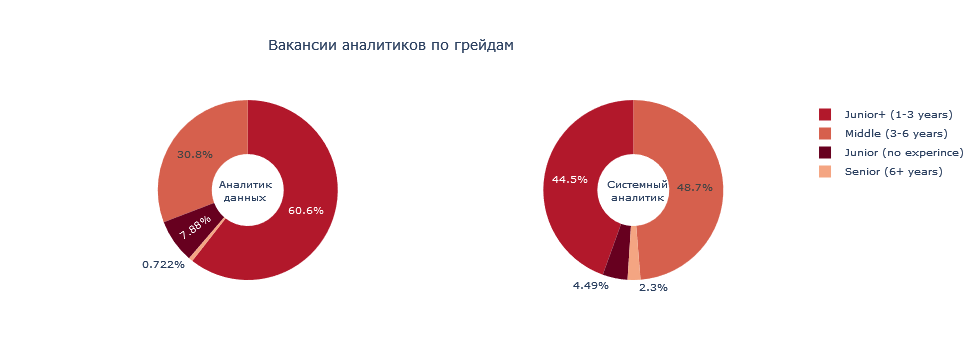

In [184]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
labels = cat_exp['experience'].unique()

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=labels, values=cat_exp['id'].loc[:3], name="Аналитик данных", marker_colors=px.colors.sequential.RdBu),
              1, 1)
fig.add_trace(go.Pie(labels=labels, values=cat_exp['id'].loc[4:], name="Системный аналитик"),
              1, 2)
fig.update_traces(hole=.4, hoverinfo="label+percent+value", hovertemplate='</br>%{label}</br>Доля: %{percent}</br> Количество: %{value}')

fig.update_layout(title_text="Вакансии аналитиков по грейдам", font=dict(size=10), title={'x':0.4},
                  annotations=[dict(text='Аналитик<br>данных', x=0.18, y=0.5, font_size=10, showarrow=False),
                 dict(text='Системный<br>аналитик', x=0.83, y=0.5, font_size=10, showarrow=False)])
fig.show()

In [185]:
fig = px.bar(df, x="experience", y="количество", color="area_category", barmode="group", facet_col="category",
            color_discrete_sequence=px.colors.sequential.RdBu, title="Вакансии аналитиков по грейдам и регионам",
            hover_data=['доля'])
fig.update_layout(autosize = False, font=dict(size=10), title={'x':0.5}, legend=dict(x=0.4, y=1, traceorder='normal'),
                  height=500, width=1200)
fig.update_traces(hovertemplate='%{fullData.name}<br>Грейд: %{x} <br>Количество: %{y} <br>Доля: %{customdata[0]:}%')
fig.update_xaxes(title=" ")
fig.update_yaxes(title=" ")
fig.show()

ВЫВОД:

За период с февраля по июнь 2024 года было опубликовано 3716 вакансий в двух категориях: аналитик данных и системный аналитик. При этом основные вакансии аналитика данных были опубликованы с февраля по июнь, а системного аналитика  - только в июне и июле.

Доля аналитиков данных в БД составляет 48,5%, системных аналитиков - 51,5%.

Распределение вакансий по грейдам выглядит следующим образом: наибольшее количество вакансий  - это Junior+ (1-3 years) - 60,6% среди аналитиков данных и 44,5% среди системных аналитиков и Middle (3-6 years) - 30,8% среди аналитиков данных и 48,7% - среди системных аналитиков.

Junior (no experince) - это 8% вакансий аналитиков данных и 4,5% вакансий системных аналитиков. Наименьшая доля вакансий грейда Senior (6+ years): 1%  аналитиков данных и 2% системных аналитиков.

По укрупненным регионам наибольшее количество вакансий в Москве, на втором месте  - в регионах и на 3-месте  - в Санкт-Петербурге. При этом вакансии грейда  Senior (6+ years)  - это преимущественно Москва, для аналитиков данных таких вакансий нет ни в СПБ, ни в регионах.

#### Определение типичного места работы для Аналитика данных и Системного аналитика по следующим параметрам: ТОП-работодателей, фзарплата, тип занятости, график работы. Ответ отдельно дайте для грейдов Junior, Junior+, Middle, Senior

In [188]:
#ТОП-20 работодателей для аналитиков данных c зарплатными предложениями
hh_db.query('category == "Аналитик данных"').\
pivot_table(index = 'employer', values=['salary_from', 'salary_to'],
            aggfunc={"salary_from":['count','median'],"salary_to":['median']}).\
sort_values(by=('salary_from', 'count'), ascending= False).head(20)

salary_from           salary_to
                                                  count    median    median
employer                                                                   
СБЕР                                                243  130000.0  166600.0
WILDBERRIES                                          43  250000.0  300000.0
Ozon                                                 34  130000.0  166600.0
Банк ВТБ (ПАО)                                       28  130000.0  166600.0
Т1                                                   26  250000.0  300000.0
МАГНИТ, Розничная сеть                               24   85000.0  108800.0
МТС                                                  22  130000.0  166600.0
Okko                                                 19  130000.0  166600.0
Центральный банк Российской Федерации                16  130000.0  166600.0
Яндекс                                               15  250000.0  300000.0
Ростелеком                                           15  100000.0  100000.0
Правительство Москвы                                 15  130000.0  166600.0
Райффайзен Банк                                      14  130000.0  166600.0
Московская Биржа                                     13  130000.0  166600.0
Деловые Линии                                        12  120000.0  149600.0
ГКУ Центр занятости населения города Москвы          12  100000.0  136000.0
Марс                                                 11  130000.0  166600.0
ANCOR                                                11  170000.0  170000.0
Спортмастер                                          10  130000.0  166600.0
Леруа Мерлен                                         10  130000.0  166600.0

In [189]:
#ТОП-20 работодателей для системных аналитиков с зарплатными предложениями
hh_db.query('category == "Системный аналитик"').\
pivot_table(index = 'employer', values=['salary_from', 'salary_to'],
            aggfunc={"salary_from":['count','median'],"salary_to":['median']}).\
sort_values(by=('salary_from', 'count'), ascending= False).head(20)

salary_from           salary_to
                                            count    median    median
employer                                                             
СБЕР                                           95  200000.0  256000.0
Т1                                             80  250000.0  300000.0
Aston                                          65   80000.0  110000.0
Совкомбанк Технологии                          37   80000.0  108800.0
ПСБ (ПАО «Промсвязьбанк»)                      30  200000.0  256000.0
Selecty                                        22  130000.0  166600.0
Т-Банк                                         22  150000.0  200000.0
Ростелеком Информационные Технологии           18  130000.0  166600.0
билайн                                         18  250000.0  300000.0
Красное & Белое, розничная сеть                16   80000.0  108800.0
Прикладные технологии                          16  150000.0  200000.0
IBS                                            15  130000.0  166600.0
МТС                                            14  225000.0  278000.0
Лига Цифровой Экономики                        13  130000.0  166600.0
ГНИВЦ                                          11  250000.0  300000.0
Центральный банк Российской Федерации          10  150000.0  200000.0
Неофлекс                                       10  130000.0  166600.0
ИЦ АЙ-ТЕКО                                     10  250000.0  300000.0
АТОМ                                            9  200000.0  256000.0
Головное подразделение Сибагро                  9  140000.0  195000.0

In [190]:
#Распределение по типу занятости
hh_db.groupby(['category', 'experience', 'employment'], as_index = False)['id'].count().head()

category             experience           employment    id
0  Аналитик данных  Junior (no experince)     Полная занятость   123
1  Аналитик данных  Junior (no experince)     Проектная работа     1
2  Аналитик данных  Junior (no experince)           Стажировка    15
3  Аналитик данных  Junior (no experince)  Частичная занятость     3
4  Аналитик данных    Junior+ (1-3 years)     Полная занятость  1079

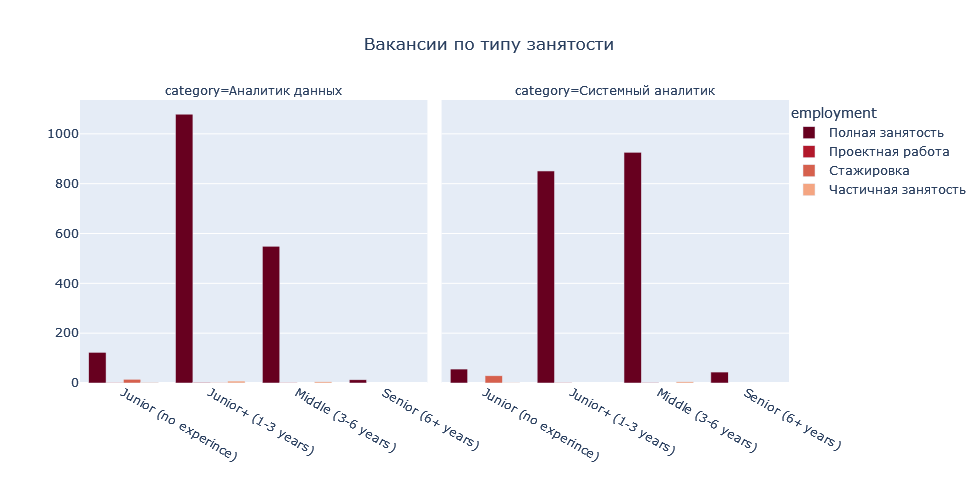

In [191]:
fig = px.bar(hh_db.groupby(['category', 'experience', 'employment'], as_index = False)['id'].count(), x="experience", y="id", 
             color="employment", barmode="group", facet_col="category",
            color_discrete_sequence=px.colors.sequential.RdBu, title="Вакансии по типу занятости")
#,hover_data=[''])
fig.update_layout(autosize = False, font=dict(size=12), title={'x':0.5}, legend=dict(x=1, y=1, traceorder='normal'),
                  height=500, width=800)
fig.update_traces(hovertemplate='%{fullData.name}<br>Грейд: %{x} <br>Количество: %{y}')
fig.update_xaxes(title=" ")
fig.update_yaxes(title=" ")
fig.show()

In [192]:
hh_db.groupby('schedule', as_index = False)['id'].count()

schedule    id
0     Гибкий график   102
1       Полный день  2644
2    Сменный график    10
3  Удаленная работа   960

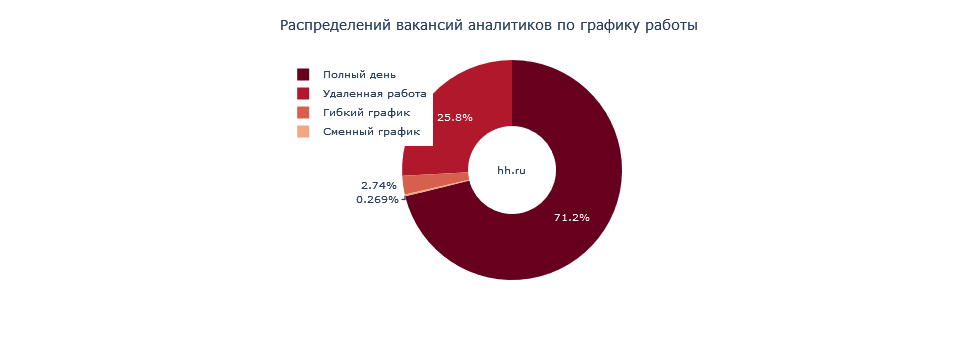

In [193]:
fig = px.pie(hh_db.groupby('schedule', as_index = False)['id'].count(), values='id', names='schedule', 
            labels='category', color_discrete_sequence=px.colors.sequential.RdBu)

fig.update_layout(title_text="Распределений вакансий аналитиков по графику работы", 
                  annotations=[dict(text='hh.ru', x=0.50, y=0.5, showarrow=False)], font=dict(size=10), title={'x':0.5},
                  legend=dict(x=0.1, y=1, traceorder='normal'))
fig.update_traces(hole=.4, hoverinfo="label+percent+name", hovertemplate='</br> %{label} </br> Доля: %{percent} </br> Количество: %{value}')
                 
fig.show()

In [194]:
#Распределение по графику работы
hh_db.groupby(['category', 'experience', 'schedule'], as_index = False)['id'].count()

category             experience          schedule   id
0      Аналитик данных  Junior (no experince)     Гибкий график    3
1      Аналитик данных  Junior (no experince)       Полный день  122
2      Аналитик данных  Junior (no experince)    Сменный график    2
3      Аналитик данных  Junior (no experince)  Удаленная работа   15
4      Аналитик данных    Junior+ (1-3 years)     Гибкий график   21
5      Аналитик данных    Junior+ (1-3 years)       Полный день  905
6      Аналитик данных    Junior+ (1-3 years)    Сменный график    7
7      Аналитик данных    Junior+ (1-3 years)  Удаленная работа  158
8      Аналитик данных     Middle (3-6 years)     Гибкий график   17
9      Аналитик данных     Middle (3-6 years)       Полный день  406
10     Аналитик данных     Middle (3-6 years)  Удаленная работа  132
11     Аналитик данных      Senior (6+ years)       Полный день    8
12     Аналитик данных      Senior (6+ years)  Удаленная работа    5
13  Системный аналитик  Junior (no experince)     Гибкий график    6
14  Системный аналитик  Junior (no experince)       Полный день   51
15  Системный аналитик  Junior (no experince)  Удаленная работа   29
16  Системный аналитик    Junior+ (1-3 years)     Гибкий график   36
17  Системный аналитик    Junior+ (1-3 years)       Полный день  553
18  Системный аналитик    Junior+ (1-3 years)  Удаленная работа  263
19  Системный аналитик     Middle (3-6 years)     Гибкий график   17
20  Системный аналитик     Middle (3-6 years)       Полный день  574
21  Системный аналитик     Middle (3-6 years)    Сменный график    1
22  Системный аналитик     Middle (3-6 years)  Удаленная работа  341
23  Системный аналитик      Senior (6+ years)     Гибкий график    2
24  Системный аналитик      Senior (6+ years)       Полный день   25
25  Системный аналитик      Senior (6+ years)  Удаленная работа   17

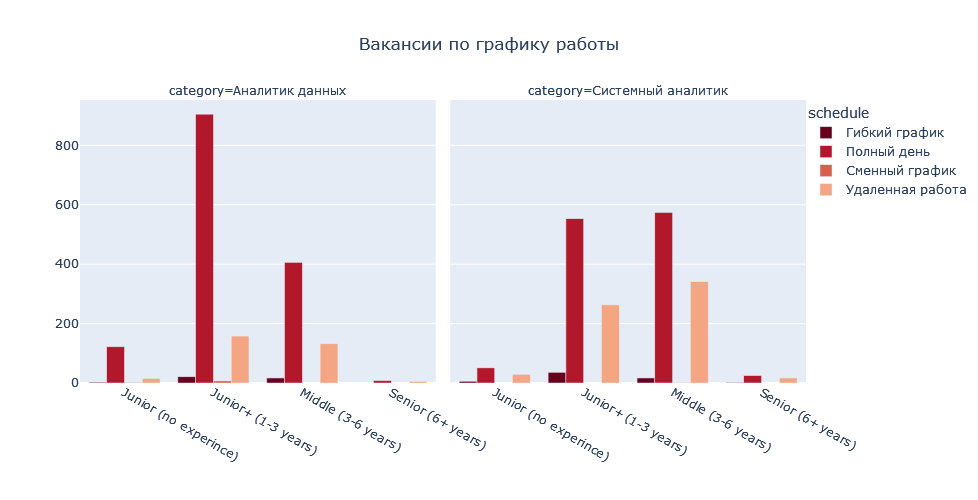

In [195]:
fig = px.bar(hh_db.groupby(['category', 'experience', 'schedule'], as_index = False)['id'].count(), x="experience", y="id", 
             color="schedule", barmode="group", facet_col="category",
            color_discrete_sequence=px.colors.sequential.RdBu, title="Вакансии по графику работы")
fig.update_layout(autosize = False, font=dict(size=12), title={'x':0.5}, legend=dict(x=1, y=1, traceorder='normal'),
                  height=500, width=1000)
fig.update_traces(hovertemplate='%{fullData.name}<br>Грейд: %{x} <br>Количество: %{y}')
fig.update_xaxes(title=" ")
fig.update_yaxes(title=" ")
fig.show()

ВЫВОД: 

ТОП-20 для аналитиков данных.
1. СБЕР
2. WILDBERRIES
3. Ozon
4. Банк ВТБ (ПАО)
5. Т1
6. МАГНИТ, Розничная сеть
7. МТС
8. Okko
9. Центральный банк Российской Федерации
10. Яндекс
11. Ростелеком
12. Правительство Москвы
13. Райффайзен Банк
14. Московская Биржа
15. Деловые Линии
16. ГКУ Центр занятости населения города Москвы
17. Марс
18. ANCOR
19. Спортмастер
20. Леруа Мерлен

ТОП-20 для системных аналитиков.
Здесь тоже преобладают финансовые компании (банки), но много системных интеграторов, госкомпаний. а также телеком-компаний
1. СБЕР
2. Т1
3. Aston
4. Совкомбанк Технологии
5. ПСБ (ПАО «Промсвязьбанк»)
6. Selecty
7. Т-Банк
8. Ростелеком Информационные Технологии
9. билайн
10. Красное & Белое, розничная сеть
11. Прикладные технологии
12. IBS
13. МТС
14. Лига Цифровой Экономики
15. ГНИВЦ
16. Центральный банк Российской Федерации
17. Неофлекс 
18. ИЦ АЙ-ТЕКО
19. АТОМ
20. Головное подразделение Сибагро


По типу занятости в основном предлагается работа на основе полной занятости. Для грейда Junior есть  предожений со стажировкой.
По графику работу наибольшее количество предожений для обоих тиапов аналитиков и всех грейом - это полный день. При этом 25% вакансий для аналитиков - это предожение об удаленной работе для всех грейдов.

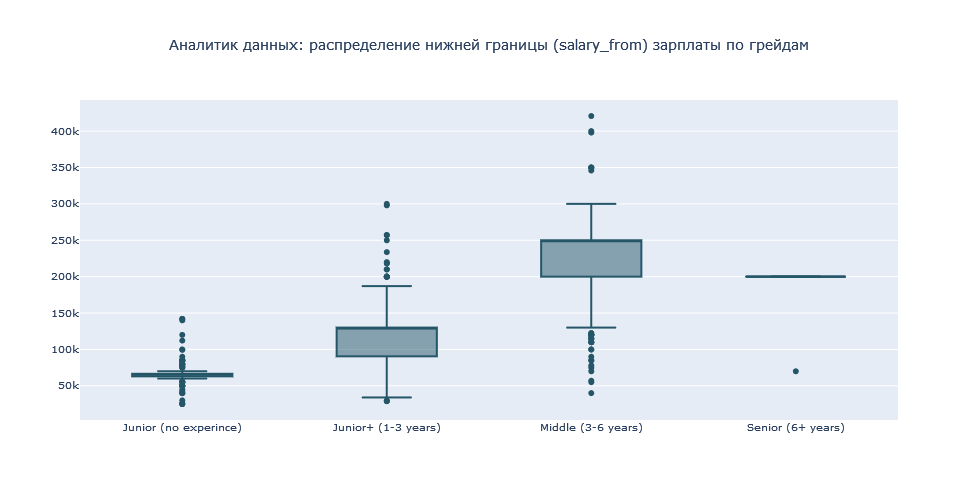

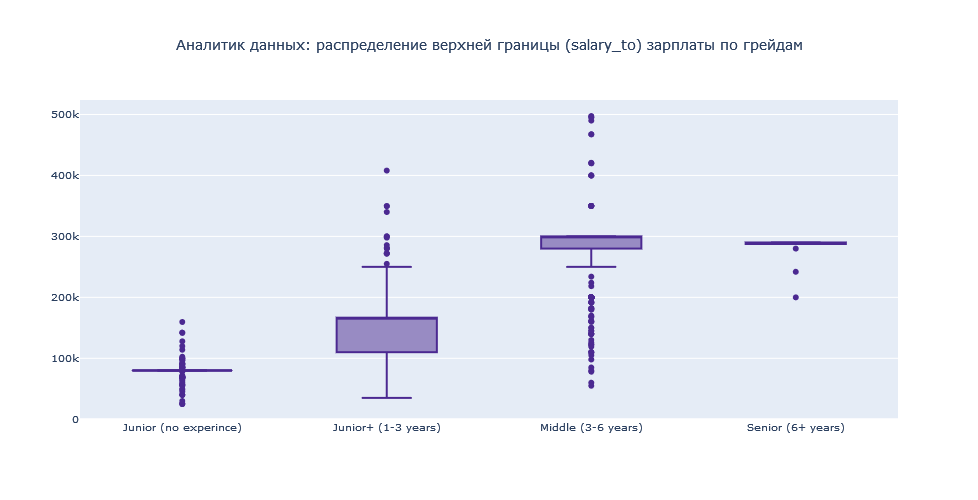

In [197]:
fig = px.box(hh_db.query('category == "Аналитик данных"'), x='experience', y="salary_from", 
             color_discrete_sequence=px.colors.sequential.Aggrnyl, title="Аналитик данных: распределение нижней границы (salary_from) зарплаты по грейдам")
fig.update_layout(autosize = False, font=dict(size=10), title={'x':0.5}, legend=dict(x=1, y=1, traceorder='normal'),
                  height=500, width=800)
fig.update_xaxes(title=" ", categoryorder='array', categoryarray= ['Junior (no experince)', 'Junior+ (1-3 years)',
       'Middle (3-6 years)', 'Senior (6+ years)'])
fig.update_yaxes(title=" ")
fig.show()
fig = px.box(hh_db.query('category == "Аналитик данных"'), x='experience', y="salary_to", 
             color_discrete_sequence=px.colors.sequential.Agsunset, title="Аналитик данных: распределение верхней границы (salary_to) зарплаты по грейдам")
fig.update_layout(autosize = False, font=dict(size=10), title={'x':0.5}, legend=dict(x=1, y=1, traceorder='normal'),
                  height=500, width=800)
fig.update_xaxes(title=" ", categoryorder='array', categoryarray= ['Junior (no experince)', 'Junior+ (1-3 years)',
       'Middle (3-6 years)', 'Senior (6+ years)'])
fig.update_yaxes(title=" ")
fig.show()

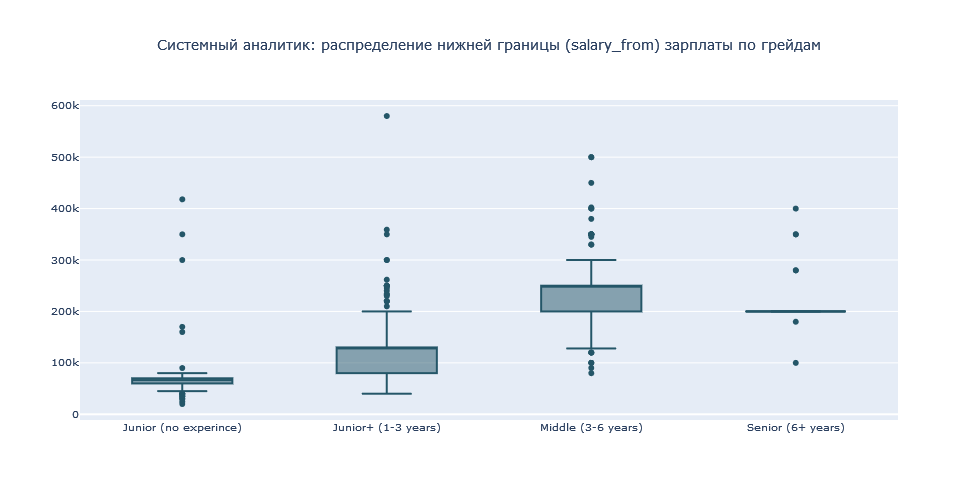

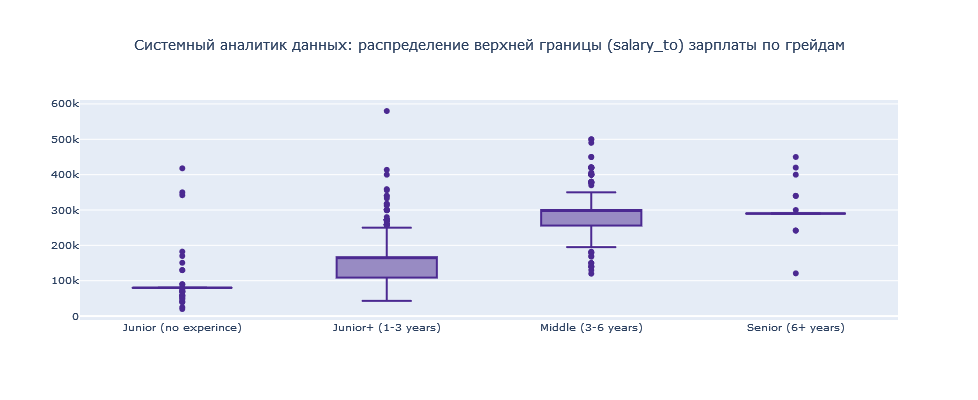

In [198]:
fig = px.box(hh_db.query('category == "Системный аналитик"'), x='experience', y="salary_from", 
             color_discrete_sequence=px.colors.sequential.Aggrnyl, title="Системный аналитик: распределение нижней границы (salary_from) зарплаты по грейдам")
fig.update_layout(autosize = False, font=dict(size=10), title={'x':0.5}, legend=dict(x=1, y=1, traceorder='normal'),
                  height=500, width=800)
fig.update_xaxes(title=" ", categoryorder='array', categoryarray= ['Junior (no experince)', 'Junior+ (1-3 years)',
       'Middle (3-6 years)', 'Senior (6+ years)'])
fig.update_yaxes(title=" ")
fig.show()
fig = px.box(hh_db.query('category == "Системный аналитик"'), x='experience', y="salary_to", 
             color_discrete_sequence=px.colors.sequential.Agsunset, title="Системный аналитик данных: распределение верхней границы (salary_to) зарплаты по грейдам")
fig.update_layout(autosize = False, font=dict(size=10), title={'x':0.5}, legend=dict(x=1, y=1, traceorder='normal'),
                  height=400, width=700)
fig.update_xaxes(title=" ", categoryorder='array', categoryarray= ['Junior (no experince)', 'Junior+ (1-3 years)',
       'Middle (3-6 years)', 'Senior (6+ years)'])
fig.update_yaxes(title=" ")
fig.show()

In [199]:
hh_db['salary_bin'] = hh_db['salary_bin'].astype(pd.api.types.CategoricalDtype(categories = ["Меньше 100 тысяч", "От 100 тысяч до 200 тысяч",
                                                                           "Больше 300 тысяч", "От 200 тысяч до 300 тысяч"]))
data_bin = hh_db.query('category == "Аналитик данных"').pivot_table(index='experience', columns='salary_bin', values='id', aggfunc='count', margins=True).\
reset_index()
data_bin

salary_bin             experience  Меньше 100 тысяч  \
0           Junior (no experince)               133   
1             Junior+ (1-3 years)                70   
2              Middle (3-6 years)                 6   
3               Senior (6+ years)                 0   
4                             All               209   

salary_bin  От 100 тысяч до 200 тысяч  Больше 300 тысяч  \
0                                   9                 0   
1                                 990                 6   
2                                  80               411   
3                                   0                 0   
4                                1079               417   

salary_bin  От 200 тысяч до 300 тысяч   All  
0                                   0   142  
1                                  25  1091  
2                                  58   555  
3                                  13    13  
4                                  96  1801

In [200]:
data_bin_share = round(data_bin[data_bin.columns[1:-1]].div(data_bin[data_bin.columns[-1]], axis=0),4)
data_bin_share.insert(0, 'experience', data_bin['experience'])
data_bin_share

salary_bin             experience  Меньше 100 тысяч  \
0           Junior (no experince)            0.9366   
1             Junior+ (1-3 years)            0.0642   
2              Middle (3-6 years)            0.0108   
3               Senior (6+ years)            0.0000   
4                             All            0.1160   

salary_bin  От 100 тысяч до 200 тысяч  Больше 300 тысяч  \
0                              0.0634            0.0000   
1                              0.9074            0.0055   
2                              0.1441            0.7405   
3                              0.0000            0.0000   
4                              0.5991            0.2315   

salary_bin  От 200 тысяч до 300 тысяч  
0                              0.0000  
1                              0.0229  
2                              0.1045  
3                              1.0000  
4                              0.0533

In [201]:
#hh_db['salary_bin'] = hh_db['salary_bin'].astype(pd.api.types.CategoricalDtype(categories = ["Меньше 100 тысяч", "От 100 тысяч до 200 тысяч",
#                                                                           "Больше 300 тысяч", "От 200 тысяч до 300 тысяч"]))
system_bin = hh_db.query('category == "Системный аналитик"').pivot_table(index='experience', columns='salary_bin', values='id', aggfunc='count', margins=True).\
reset_index()
system_bin

salary_bin             experience  Меньше 100 тысяч  \
0           Junior (no experince)                78   
1             Junior+ (1-3 years)                17   
2              Middle (3-6 years)                 0   
3               Senior (6+ years)                 0   
4                             All                95   

salary_bin  От 100 тысяч до 200 тысяч  Больше 300 тысяч  \
0                                   5                 3   
1                                 775                15   
2                                 180               607   
3                                   1                 6   
4                                 961               631   

salary_bin  От 200 тысяч до 300 тысяч   All  
0                                   0    86  
1                                  45   852  
2                                 146   933  
3                                  37    44  
4                                 228  1915

In [202]:
system_bin_share = round(system_bin[system_bin.columns[1:-1]].div(system_bin[system_bin.columns[-1]], axis=0),4)
system_bin_share.insert(0, 'experience', system_bin['experience'])
system_bin_share

salary_bin             experience  Меньше 100 тысяч  \
0           Junior (no experince)            0.9070   
1             Junior+ (1-3 years)            0.0200   
2              Middle (3-6 years)            0.0000   
3               Senior (6+ years)            0.0000   
4                             All            0.0496   

salary_bin  От 100 тысяч до 200 тысяч  Больше 300 тысяч  \
0                              0.0581            0.0349   
1                              0.9096            0.0176   
2                              0.1929            0.6506   
3                              0.0227            0.1364   
4                              0.5018            0.3295   

salary_bin  От 200 тысяч до 300 тысяч  
0                              0.0000  
1                              0.0528  
2                              0.1565  
3                              0.8409  
4                              0.1191

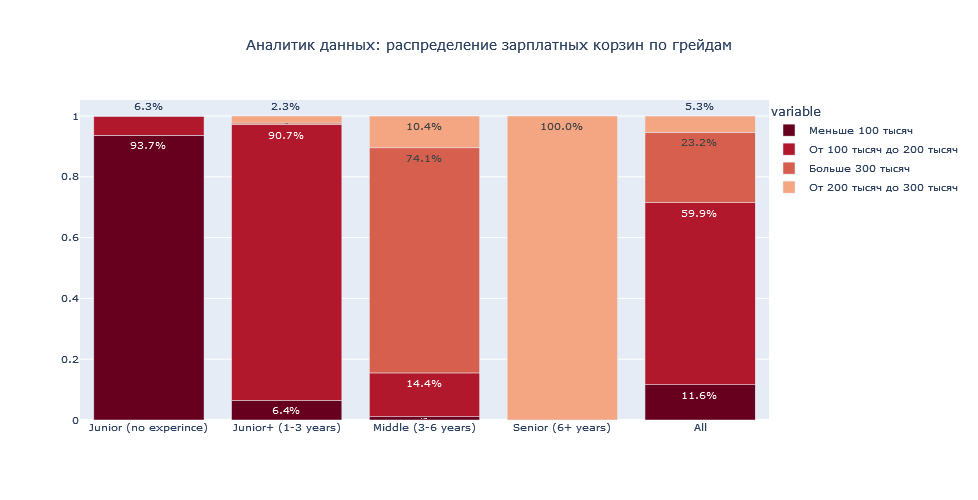

In [203]:
#посмтроим графики распределения корзины зарплат по грейдам для дата и системных аналитиков
fig = px.bar(data_bin_share, x="experience", y=["Меньше 100 тысяч", "От 100 тысяч до 200 тысяч", 
                                                "Больше 300 тысяч", "От 200 тысяч до 300 тысяч"], 
             title="Аналитик данных: распределение зарплатных корзин по грейдам",  text_auto= '1.1%',
            color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_layout(autosize = False, font=dict(size=10), title={'x':0.5}, legend=dict(x=1, y=1, traceorder='normal'),
                  height=500, width=900)

fig.update_xaxes(title=" ")
fig.update_yaxes(title=" ")
fig.show()

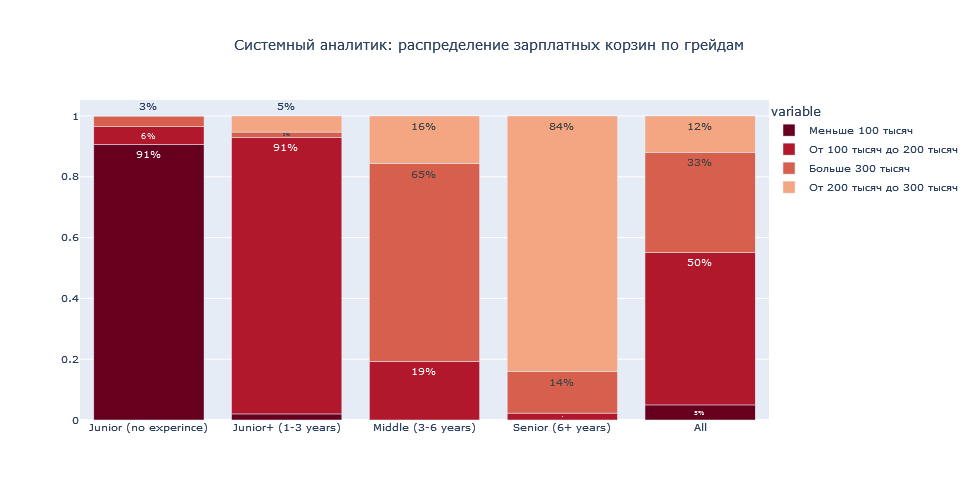

In [204]:
#посмтроим графики распределения корзины зарплат по грейдам для дата и системных аналитиков
fig = px.bar(system_bin_share, x="experience", y=["Меньше 100 тысяч", "От 100 тысяч до 200 тысяч", 
                                                "Больше 300 тысяч", "От 200 тысяч до 300 тысяч"], 
             title="Системный аналитик: распределение зарплатных корзин по грейдам",  text_auto= '1.0%',
            color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_layout(autosize = False, font=dict(size=10), title={'x':0.5}, legend=dict(x=1, y=1, traceorder='normal'),
                  height=500, width=900)

fig.update_xaxes(title=" ")
fig.update_yaxes(title=" ")
fig.show()

ВЫВОД: 

Что касается уровня предлагамой заработной платы, то с одной мы видим явное различие в заработной плате для грейдов.
Для аналитиков данных Junior (no experince): минимум 25 тыс руб. при медиане в диапазоне  - 66,5 тыс. -  80 тыс. руб., Junior+ (1-3 years)  - минимум 30 тыс. руб. при медиане  - 130 -166  тыс. руб. Далее идет большой разрыв между Junior-грейдами и Middle (3-6 years). Для Middle (3-6 years) нижняя граница 130 тыс. руб. при медиане 250-300 тыс. руб. При этом зарплатные предложения для Senior (6+ years) в районе 200-290 тыс. руб. Но предложений с вакансиями этого грейда недостаточно, чтобы сделать выводы. 

Для системных аналитиков Junior (no experince) - также минимум 20 тыс руб. при медиане в диапазоне  - 66,5 тыс. -  80 тыс. руб., Junior+ (1-3 years)  - минимум 40 тыс. руб. при также же медиане  - 130 -166  тыс. руб. У системзиков мы тоже видим значительное зарплаты для Middle (3-6 years): при минимуме 80 тыс. руб. медиана 250-300 тыс. руб. При этом зарплатные предложения для Senior (6+ years) в районе 180-300 тыс. руб. Но предложений с вакансиями этого грейда для системных аналитиков тоже крайне мало. 

Если смотреть распределение предложений заработных плат на основе salary_bin (корзины зарплат), то видно, что 90%  для Junior (no experince) - это до 100000 рублей, для Junior+ (1-3 years) - от 100 до 200 тысяч, для Middle (3-6 years) - основная долдя  - больше 300000. Последнее говорит о том, что работодатель готов идти навстречу кандидату с подходящими навыками и опытом, поэтому фактически указывает зарплату максимально возможную. Ручная проверка показывает, что многие работодатели указали границу для ваканий от минимальных 100 до свыше 300, в связи с чем все эти вакансии попали в Больше 300 тысяч.
В этом смысле показатель salary_bin не является таким же информативным, как указаные границ возможной заработной платы.


#### Определение, какие навыки спрашивают чаще - твердые или мягкие. К какому грейду и к какой специальности требований больше.

In [207]:
#Доля уникальных хард и софт скиллов в вакансиях. Убираем навыки категории unknown - 
#не смотря на их многочисленность, они не входят в ТОП-100 требуемых навыков, поэтому в категоризацию не попал
df_skills = hh_exp.query('category_skills !=  "unknown"')[['all_skills', 'category_skills']].drop_duplicates()
df_skills.groupby('category_skills', as_index = False)['all_skills'].count()

category_skills  all_skills
0            hard          77
1            soft          22

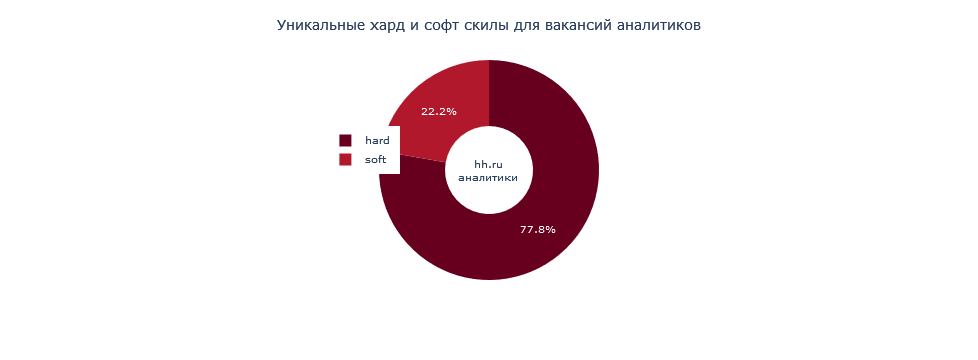

In [208]:
fig = px.pie(df_skills.groupby('category_skills', as_index = False)['all_skills'].count(), values='all_skills', names='category_skills', 
            labels='category_skills', color_discrete_sequence=px.colors.sequential.RdBu)

fig.update_layout(title_text="Уникальные хард и софт скилы для вакансий аналитиков", 
                  annotations=[dict(text='hh.ru<br>аналитики', x=0.50, y=0.5, showarrow=False)], font=dict(size=10), title={'x':0.5},
                  legend=dict(x=0.3, y=0.7, traceorder='normal'))
fig.update_traces(hole=.4, hoverinfo="label+percent+name", hovertemplate='</br> %{label} </br> Доля: %{percent} </br> Количество: %{value}')
                 
fig.show()

In [209]:
#ТОП-20 навыков, указываемых работодателем, для аналитика дяннх
top_20_data_skills = hh_exp.query('all_skills != "нет информации" & category == "Аналитик данных"').\
groupby(['all_skills','category_skills'], as_index = False)['id'].count().sort_values(by='id', ascending = False).head(20)
top_20_data_skills = top_20_data_skills.sort_values(by='id')
top_20_data_skills

all_skills category_skills   id
72                            confluence            hard   52
109                                  etl            hard   53
530                      прогнозирование            soft   53
55                              big data            hard   59
241                           powerpoint            hard   65
8                              a/b тесты            hard   66
305                              tableau            hard   94
402                         документация            hard   95
425                         коммуникация            soft  111
579                           статистика            hard  157
358                     бизнес-аналитика            hard  167
230                               pandas            hard  168
540  работа с большим объемом информации            soft  183
114                                excel            hard  238
238                             power bi            hard  270
353                          базы данных            hard  275
346               аналитическое мышление            soft  330
249                               python            hard  582
337                        анализ данных            hard  589
296                                  sql            hard  838

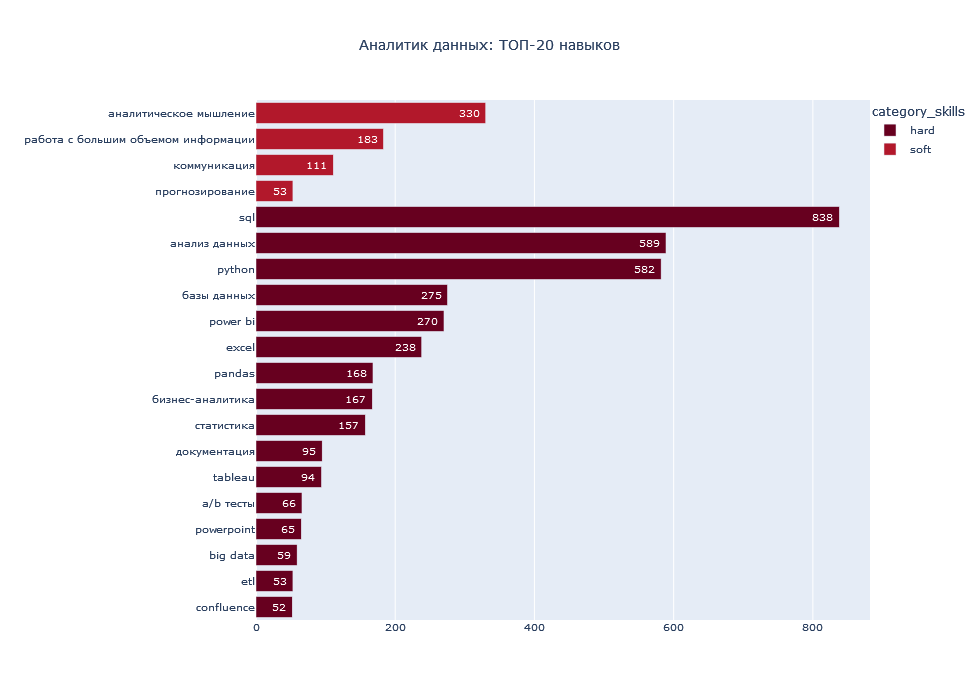

In [210]:
fig = px.bar(top_20_data_skills, x="id", y="all_skills", color='category_skills', orientation='h',
             hover_data=["id"], text_auto = True,
             height=400, color_discrete_sequence=px.colors.sequential.RdBu,
             title='Аналитик данных: ТОП-20 навыков')
fig.update_layout(autosize = False, font=dict(size=10), title={'x':0.5}, legend=dict(x=1, y=1, traceorder='normal'),
                  height=700, width=900)

fig.update_xaxes(title=" ")
fig.update_yaxes(title=" ")
fig.show()

In [211]:
#ТОП-20 навыков, указываемых работодателем, для аналитика дяннх
top_20_system_skills = hh_exp.query('all_skills != "нет информации" & category == "Системный аналитик"').\
groupby(['all_skills','category_skills'], as_index = False)['id'].count().sort_values(by='id', ascending = False).head(20)
top_20_system_skills = top_20_system_skills.sort_values(by='id')
top_20_system_skills

all_skills category_skills   id
188                                     json            hard  142
7                                      agile            soft  145
427  анализ и моделирование бизнес-процессов            hard  171
184                                     jira            hard  174
439                              базы данных            hard  179
19                                       api            hard  182
444                         бизнес-аналитика            hard  192
426                            анализ данных            hard  193
405                                      xml            hard  206
605           постановка задач разработчикам            soft  210
429                   аналитическое мышление            soft  243
654           разработка технических заданий            hard  247
324                                     soap            hard  275
76                                confluence            hard  353
489                             документация            hard  450
295                                     rest            hard  470
364                                      uml            hard  561
675                      системная аналитика            hard  583
51                                      bpmn            hard  635
330                                      sql            hard  748

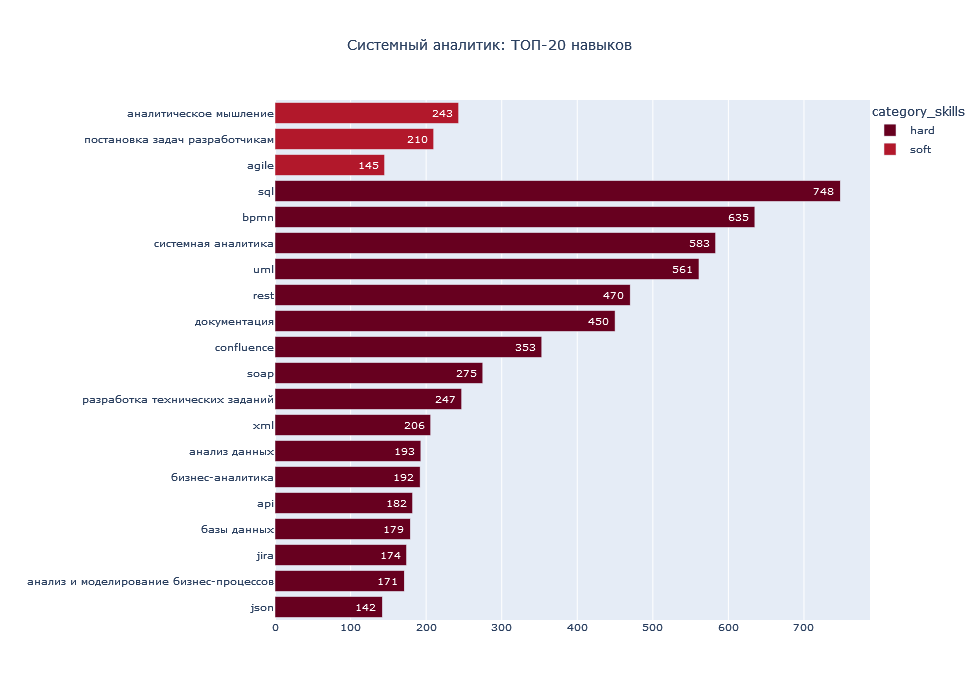

In [212]:
fig = px.bar(top_20_system_skills, x="id", y="all_skills", color='category_skills', orientation='h',
             hover_data=["id"], text_auto = True,
             height=400, color_discrete_sequence=px.colors.sequential.RdBu,
             title='Системный аналитик: ТОП-20 навыков')
fig.update_layout(autosize = False, font=dict(size=10), title={'x':0.5}, legend=dict(x=1, y=1, traceorder='normal'),
                  height=700, width=900)

fig.update_xaxes(title=" ")
fig.update_yaxes(title=" ")
fig.show()

In [213]:
#Количество навыков на одну вакансию
hh_exp.query('all_skills != "нет информации"').groupby(['category_skills','id', 'experience'], as_index = False)['all_skills'].count().head()

category_skills        id           experience  all_skills
0            hard  52410168  Junior+ (1-3 years)           4
1            hard  52410189  Junior+ (1-3 years)           3
2            hard  52410283  Junior+ (1-3 years)           5
3            hard  53930857  Junior+ (1-3 years)           6
4            hard  55510829  Junior+ (1-3 years)           3

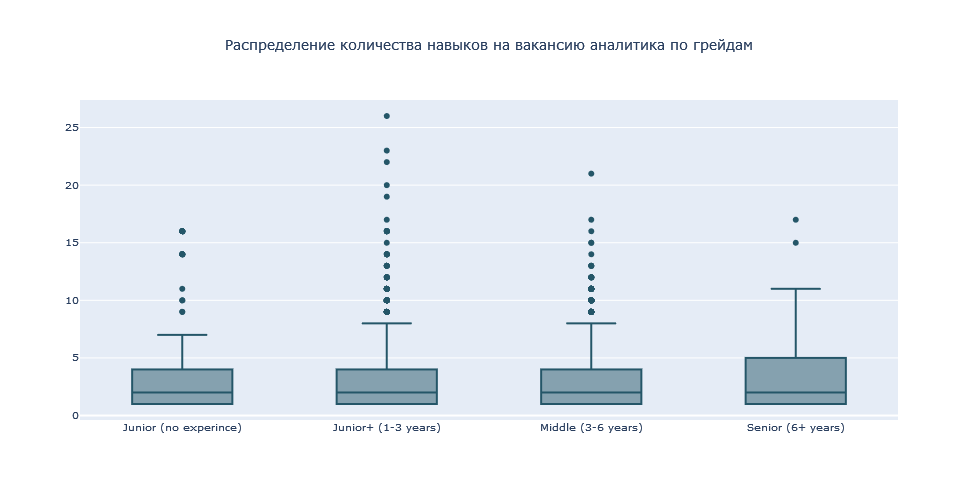

In [214]:
fig = px.box(hh_exp.query('all_skills != "нет информации"').groupby(['category_skills','id', 'experience'], as_index = False)['all_skills'].count(), 
             x='experience', y="all_skills", 
             color_discrete_sequence=px.colors.sequential.Aggrnyl, title="Распределение количества навыков на вакансию аналитика по грейдам")
fig.update_layout(autosize = False, font=dict(size=10), title={'x':0.5}, legend=dict(x=1, y=1, traceorder='normal'),
                  height=500, width=800)
fig.update_xaxes(title=" ", categoryorder='array', categoryarray= ['Junior (no experince)', 'Junior+ (1-3 years)',
       'Middle (3-6 years)', 'Senior (6+ years)'])
fig.update_yaxes(title=" ")
fig.show()

#### ВЫВОД

При анализе было выделено 100 уникальных наиболее встречаемых навыков, при этом 78% из них - это так называемые hard skills и только 22% soft.
Далее мы определили ТОП-20 навыков для каждого типа аналитика.
Для аналитиков данных главными хард скиллами являются sql, анализ данных, python, базы данных, power bi, excel, pandas, бизнес-аналитика  и тд. В ТОП-20 вошли и 4 софт скилла: аналитическое мышление, работа с большим объемом информации, коммуникация и прогнозирования.
Для системных аналитиков  - sql,  bpmn, системная аналитика, uml, rest, документация и тд. Среди них три основных софт-скилла: аналитическое мышление, поставновка задач разработчикам и agile.
Распределение количества навыков, указанных в одной вакансии, показало, что для всех грейдов медиана - это два навыка, но с возрастание грейда верхняя граница количества навыков увеличивается: Junior (no experince) - 7, Junior+ (1-3 years) - 8,  Middle (3-6 years) - 8, Senior (6+ years) - 11.


ОБЩИЙ ВЫВОД:


Всего в выгрузке после соединения таблиц 3716 строк.
Пропуски в столбцах department - 76%  - будут заменены на unknown
81% и 86% пропусках в столбцах salary_from и salary_to соответственно, при этом столбец salary_bin заполнен.
key_skills_from_key_skills_field    36.302476 %
hard_skills_from_description        73.412271 %
soft_skills_from_description        45.775027 %
При этом столбец key_skills не содержит пропусков.

Аномальных числовых значений на гистограммах не выявлено.
Дата публикация вакансий март - июль 2024, наибольшее количество вакансий опубликовано в июле 2024 года.

ВЫВОД:
На этапе предобработки данных мы проверили столбцы 'type', 'employer', department, area  на неявные дубликты.
Ввели новый столбце для категоризации территории: area_category со значениями Регионы', 'Москва', 'Санкт-Петербург'.
Далее проверили также на неявные дубликаты стобцы experience, schedule, employment, salary_bin.
Следующим этапом стало заполнение пропусков столбцов, связанных с зарплатными ожиданиями. Здесь изучили выбросы в разрезе опыта работы (грейда), исправлии аномалии. Далее были заполнены пропуски для столбца salary_from при заполненном salary_ro: для таких вакансий установили, что salary_to == salary_from
Для ваканасий  , у которых заполнено salary_from, но не заполнен salary_to, мы заполили salary_from с использование специального коэффициента. Для определения этого  кожффициента использовали медиану границ зарплат в соотвествтии с грейдом.
После чего оставшиеся пропущенные значения столбцов salary_from и salary_to, которые попали в ЗП не указана, заменили пропущенные значения salary_from и salary_to с учетом столбца experience и area_category, и далее изменирли  значение "ЗП не указана" в salary_bin в соответствии с нижний и верхней границей зарплаты.
Далее провели проверку на неявные дубликаты в названиях компаний.
Последним, самым трудоемким, этапом стало ислелдвоание и обработка столбцов, связанных с ключевыми навыками - заполнение пропусков и определение категории навыков: hard или soft.
В Поле key_skills_from_key_skills_field добавляем недостающие навыки из key_skills и переименоваваем столбец в all_skills. Во всех столбцах меняем пропуски на "нет информации" и приводим написание навыков к нижнему регистру. Далее с помощью регулярынх выражений работаем с неявными дубликатами. Но выполнение их занимает много машинного времению. Поэтому переходим к второму способу. Разбиваем на множество строк датафрейм, применяя explode к столбцу all_skills и дальше работаем с неявными дубликатами. В итоге получаем 100 самых популярных навыков, которые категоризуем на hard и soft.
Можно было бы еще подробнее разобраться с оставшимися навыками, убрать среди них неявные дубликаты, а также категоризировать на hard и soft, но, к сожалению, на это недостаточно времени, а возможно, и не нужно, так как основные навыки мы определили.


За период с февраля по июнь 2024 года было опубликовано 3716 вакансий в двух категориях: аналитик данных и системный аналитик. При этом основные вакансии аналитика данных были опубликованы с февраля по июнь, а системного аналитика - только в июне и июле.

Доля аналитиков данных в БД составляет 48,5%, системных аналитиков - 51,5%.

Распределение вакансий по грейдам выглядит следующим образом: наибольшее количество вакансий - это Junior+ (1-3 years) - 60,6% среди аналитиков данных и 44,5% среди системных аналитиков и Middle (3-6 years) - 30,8% среди аналитиков данных и 48,7% - среди системных аналитиков.

Junior (no experince) - это 8% вакансий аналитиков данных и 4,5% вакансий системных аналитиков. Наименьшая доля вакансий грейда Senior (6+ years): 1% аналитиков данных и 2% системных аналитиков.

По укрупненным регионам наибольшее количество вакансий в Москве, на втором месте - в регионах и на 3-месте - в Санкт-Петербурге. При этом вакансии грейда Senior (6+ years) - это преимущественно Москва, для аналитиков данных таких вакансий нет ни в СПБ, ни в регионах.

Далее мы определили 
ТОП-20 работодателей для аналитиков данных и системных аналитиков c зарплатными предложениями. 
Это преимущественно финансовые компании, в мтом числе банки, IT и телеком, большие розничные сети и большие гос компании.

ТОП-20 для аналитиков данных.
1. СБЕР
2. WILDBERRIES
3. Ozon
4. Банк ВТБ (ПАО)
5. Т1
6. МАГНИТ, Розничная сеть
7. МТС
8. Okko
9. Центральный банк Российской Федерации
10. Яндекс
11. Ростелеком
12. Правительство Москвы
13. Райффайзен Банк
14. Московская Биржа
15. Деловые Линии
16. ГКУ Центр занятости населения города Москвы
17. Марс
18. ANCOR
19. Спортмастер
20. Леруа Мерлен

ТОП-20 для системных аналитиков.
Здесь тоже преобладают финансовые компании (банки), но много системных интеграторов, госкомпаний. а также телеком-компаний
1. СБЕР
2. Т1
3. Aston
4. Совкомбанк Технологии
5. ПСБ (ПАО «Промсвязьбанк»)
6. Selecty
7. Т-Банк
8. Ростелеком Информационные Технологии
9. билайн
10. Красное & Белое, розничная сеть
11. Прикладные технологии
12. IBS
13. МТС
14. Лига Цифровой Экономики
15. ГНИВЦ
16. Центральный банк Российской Федерации
17. Неофлекс 
18. ИЦ АЙ-ТЕКО
19. АТОМ
20. Головное подразделение Сибагро


По типу занятости в основном предлагается работа на основе полной занятости. Для грейда Junior есть  предожений со стажировкой.
По графику работу наибольшее количество предожений для обоих тиапов аналитиков и всех грейом - это полный день. При этом 25% вакансий для аналитиков - это предожение об удаленной работе для всех грейдов.

Что касаестся уровня предлагамой заработной платы, то с одной мы видим явное различие в заработной плате для грейдов.
Для аналитиков данных Junior (no experince): минимум 25 тыс руб. при медиане в диапазоне  - 66,5 тыс. -  80 тыс. руб., Junior+ (1-3 years)  - минимум 30 тыс. руб. при медиане  - 130 -166  тыс. руб. Далее идет большой разрыв между Junior-грейдами и Middle (3-6 years). Для Middle (3-6 years) нижняя граница 130 тыс. руб. при медиане 250-300 тыс. руб. При этом зарплатные предложения для Senior (6+ years) в районе 200-290 тыс. руб. Но предложений с вакансиями этого грейда недостаточно, чтобы сделать выводы. 

Для системных аналитиков Junior (no experince) - также минимум 20 тыс руб. при медиане в диапазоне  - 66,5 тыс. -  80 тыс. руб., Junior+ (1-3 years)  - минимум 40 тыс. руб. при также же медиане  - 130 -166  тыс. руб. У системзиков мы тоже видим значительное зарплаты для Middle (3-6 years): при минимуме 80 тыс. руб. медиана 250-300 тыс. руб. При этом зарплатные предложения для Senior (6+ years) в районе 180-300 тыс. руб. Но предложений с вакансиями этого грейда для системных аналитиков тоже крайне мало. 

Если смотреть распределение предложений заработных плат на основе salary_bin (корзины зарплат), то видно, что 90%  для Junior (no experince) - это до 100000 рублей, для Junior+ (1-3 years) - от 100 до 200 тысяч, для Middle (3-6 years) - основная долдя  - больше 300000. Последнее говорит о том, что работодатель готов идти навстречу кандидату с подходящими навыками и опытом, поэтому фактически указывает зарплату максимально возможную. Ручная проверка показывает, что многие работодатели указали границу для ваканий от минимальных 100 до свыше 300, в связи с чем все эти вакансии попали в Больше 300 тысяч.
В этом смысле показатель salary_bin не является таким же информативным, как указаные границ возможной заработной платы.

При анализе было выделено 100 уникальных наиболее встречаемых навыков, при этом 78% из них - это так называемые hard skills и только 22% soft.
Далее мы определили ТОП-20 навыков для каждого типа аналитика.
Для аналитиков данных главными хард скиллами являются sql, анализ данных, python, базы данных, power bi, excel, pandas, бизнес-аналитика  и тд. В ТОП-20 вошли и 4 софт скилла: аналитическое мышление, работа с большим объемом информации, коммуникация и прогнозирования.
Для системных аналитиков  - sql,  bpmn, системная аналитика, uml, rest, документация и тд. Среди них три основных софт-скилла: аналитическое мышление, поставновка задач разработчикам и agile.
Распределение количества навыков, указанных в одной вакансии, показало, что для всех грейдов медиана - это два навыка, но с возрастание грейда верхняя граница количества навыков увеличивается: Junior (no experince) - 7, Junior+ (1-3 years) - 8,  Middle (3-6 years) - 8, Senior (6+ years) - 11.



РЕКОМЕНДАЦИИ:

К сожалению, у меня нет возможности написать более подробные рекомендации, да и вряд ли это нужно реальным HH, ограничусь несколькими.
1. Более точно указыать границы зарплаты, с одной стороны, не занижая их для  Junior (no experince), с другй стороны, не создавать нереальные зарплатыне ожидания для Junior+ (1-3 years) и  Middle (3-6 years), тем самым ставя под сомнение серьезность намерений работодателя. Речь идет о таких вакансиях, где граница указана с 80.000 и до более 300000.
2. При указании навыков использовать общепринятые выражения и названия навыков, избегать опечаток. При указании навыков не надо стремится указать ввесь спектр возможных навыков. Это явно ограничит круг кандидатов и приводит к возникновению вакансий, в которых для грейда Junior указано навыков больше, чем для Senior. Но если вакансия специфичная и ищется специалист именно в этой сфере и/или именно с этим опытом работы и знанием определенных инструментов, то указывать их обязательно, тем самым отсеивая ненужных кандидатов.  